In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

from tqdm import tqdm
from IPython.display import display

from sklearn import base
from sklearn import pipeline as pip
from sklearn import impute as imp
from sklearn import preprocessing as pre
from sklearn import compose as com
from sklearn import model_selection as mod
from sklearn import impute as imp

In [2]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

customer_num quarter  sales         log establishment_date  number_of_emp  \
0  RATI9590GZD  2017Q4    NaN  2017-06-14         2001-01-26            8.0   
1  RATI2539VHR  2015Q4    0.0  2015-02-20         1994-03-08           21.0   
2  RATI4481GNN  2010Q4    0.0  2010-12-07         1996-01-27            7.0   
3  RATI4948THA  2012Q4    1.0  2012-10-02         2004-04-07           34.0   
4  RATI8841WYZ  2013Q4    0.0  2013-05-27         2006-04-24           15.0   

             sector                        region  total_risk  total_limit  \
0  RETAIL-WHOLESALE                Marmara Region     70614.0    7000362.0   
1     MANUFACTURING       Central Anatolia Region    682662.0    2353551.0   
2  RETAIL-WHOLESALE          Mediterranean Region    115745.0     592723.0   
3     MANUFACTURING  Southeastern Anatolia Region     39234.0    2470770.0   
4          SERVICES                 Aegean Region     70894.0     505769.0   

   totalRiskT1  totalRiskT2  totalRiskT3  totalRiskT4  totalLimitT1  \
0      77004.0      75002.0      67859.0      47342.0     6299583.0   
1     675909.0     709079.0     738072.0     683153.0     2188838.0   
2     112913.0     105124.0     111205.0     116312.0      557378.0   
3      39148.0      38039.0      37282.0      35821.0     2422098.0   
4      70337.0      63175.0      63554.0      80901.0      495645.0   

   totalLimitT2  totalLimitT3  totalLimitT4  companyAge  
0     6867406.0     6935723.0     5860498.0       16.94  
1     2298960.0     2137717.0     3035324.0       23.83  
2      507497.0      497358.0      522139.0       21.94  
3     2373239.0     2302184.0     2071846.0       13.74  
4      511140.0      551499.0      556069.0       11.70

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_num        11335 non-null  object 
 1   quarter             11335 non-null  object 
 2   sales               8507 non-null   float64
 3   log                 11335 non-null  object 
 4   establishment_date  11335 non-null  object 
 5   number_of_emp       11160 non-null  float64
 6   sector              11335 non-null  object 
 7   region              10492 non-null  object 
 8   total_risk          11219 non-null  float64
 9   total_limit         11219 non-null  float64
 10  totalRiskT1         11219 non-null  float64
 11  totalRiskT2         11219 non-null  float64
 12  totalRiskT3         11219 non-null  float64
 13  totalRiskT4         11256 non-null  float64
 14  totalLimitT1        11219 non-null  float64
 15  totalLimitT2        11219 non-null  float64
 16  tota

In [4]:
df.describe()

sales  number_of_emp    total_risk   total_limit   totalRiskT1  \
count  8507.000000   11160.000000  1.121900e+04  1.121900e+04  1.121900e+04   
mean      0.169507      16.543011  1.005779e+06  2.534568e+06  1.004360e+06   
std       0.375222      82.639732  1.803999e+07  1.860757e+07  1.892642e+07   
min       0.000000       1.000000  0.000000e+00  2.518000e+03  0.000000e+00   
25%       0.000000       4.000000  1.195215e+05  5.137050e+05  1.190670e+05   
50%       0.000000       8.000000  3.955570e+05  1.290322e+06  3.900450e+05   
75%       0.000000      16.000000  1.005490e+06  2.934676e+06  9.932120e+05   
max       1.000000    3333.000000  1.894825e+09  1.894825e+09  1.989566e+09   

        totalRiskT2   totalRiskT3   totalRiskT4  totalLimitT1  totalLimitT2  \
count  1.121900e+04  1.121900e+04  1.125600e+04  1.121900e+04  1.121900e+04   
mean   1.011505e+06  9.832552e+05  1.101786e+06  2.546438e+06  2.562403e+06   
std    2.042825e+07  1.841203e+07  2.599993e+07  1.948606e+07  2.099627e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.428000e+03  2.566000e+03   
25%    1.187575e+05  1.178940e+05  1.191592e+05  5.126880e+05  5.135900e+05   
50%    3.867900e+05  3.827990e+05  3.699235e+05  1.281239e+06  1.279791e+06   
75%    9.907635e+05  9.775910e+05  9.304192e+05  2.934130e+06  2.918492e+06   
max    2.148731e+09  1.933858e+09  1.991874e+09  1.989566e+09  2.148731e+09   

       totalLimitT3  totalLimitT4    companyAge  
count  1.121900e+04  1.125600e+04  11335.000000  
mean   2.543222e+06  2.539575e+06     15.912608  
std    1.905043e+07  2.641071e+07      7.750846  
min    2.296000e+03  3.006000e+03      1.550000  
25%    5.112025e+05  4.760820e+05     10.010000  
50%    1.275169e+06  1.188840e+06     14.510000  
75%    2.929904e+06  2.674064e+06     21.030000  
max    1.933858e+09  1.991874e+09    118.030000

In [5]:
df.isna().sum()

customer_num             0
quarter                  0
sales                 2828
log                      0
establishment_date       0
number_of_emp          175
sector                   0
region                 843
total_risk             116
total_limit            116
totalRiskT1            116
totalRiskT2            116
totalRiskT3            116
totalRiskT4             79
totalLimitT1           116
totalLimitT2           116
totalLimitT3           116
totalLimitT4            79
companyAge               0
dtype: int64

In the previous notebook, I merged the demographic, financial, and limit-risk data. In this notebook, my primary focus will be on constructing a pipeline that facilitates the imputation of missing values, the generation of new features, and the construction of a predictive model.

Let's proceed by creating classes for imputation, starting with the 'region' attribute.

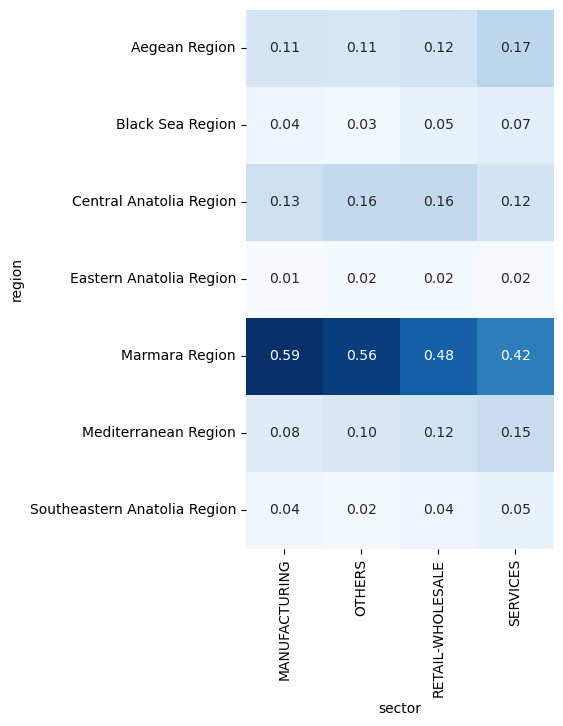

In [6]:
cross_tab = pd.crosstab(df['region'], df['sector'], normalize="columns")

plt.figure(figsize=(10, 7))
sns.heatmap(cross_tab, annot=True, square = True, fmt='.2f', cbar = False, cmap=plt.cm.Blues) 
plt.show()

Customers from the Marmara region appear to be predominantly represented in the dataset. I will impute the missing values in the 'region' column with 'Marmara Region'. For this specific imputation, I do not plan to create a separate pipeline step.

In [7]:
df.region.value_counts()

region
Marmara Region                  5391
Central Anatolia Region         1601
Aegean Region                   1249
Mediterranean Region            1153
Black Sea Region                 491
Southeastern Anatolia Region     405
Eastern Anatolia Region          202
Name: count, dtype: int64

In [8]:
imputer = imp.SimpleImputer(strategy="most_frequent")
df["region"] = pd.DataFrame(imputer.fit_transform(df[["region"]]), index = df.index)
df.region.value_counts()

region
Marmara Region                  6234
Central Anatolia Region         1601
Aegean Region                   1249
Mediterranean Region            1153
Black Sea Region                 491
Southeastern Anatolia Region     405
Eastern Anatolia Region          202
Name: count, dtype: int64

I will save the data at this point because I have made changes to my preprocessed data.

In [9]:
df.to_csv("preprocessed_data_2.csv", index = False)

In [10]:
df.isna().sum()

customer_num             0
quarter                  0
sales                 2828
log                      0
establishment_date       0
number_of_emp          175
sector                   0
region                   0
total_risk             116
total_limit            116
totalRiskT1            116
totalRiskT2            116
totalRiskT3            116
totalRiskT4             79
totalLimitT1           116
totalLimitT2           116
totalLimitT3           116
totalLimitT4            79
companyAge               0
dtype: int64

Given that the data is strongly skewed to the right, I will consider only those entries with values less than 1.5 times the Interquartile Range (IQR) to visualize the relationship between the number of employees, and the region and sector. Now, let's continue with the analysis of the number of employees.

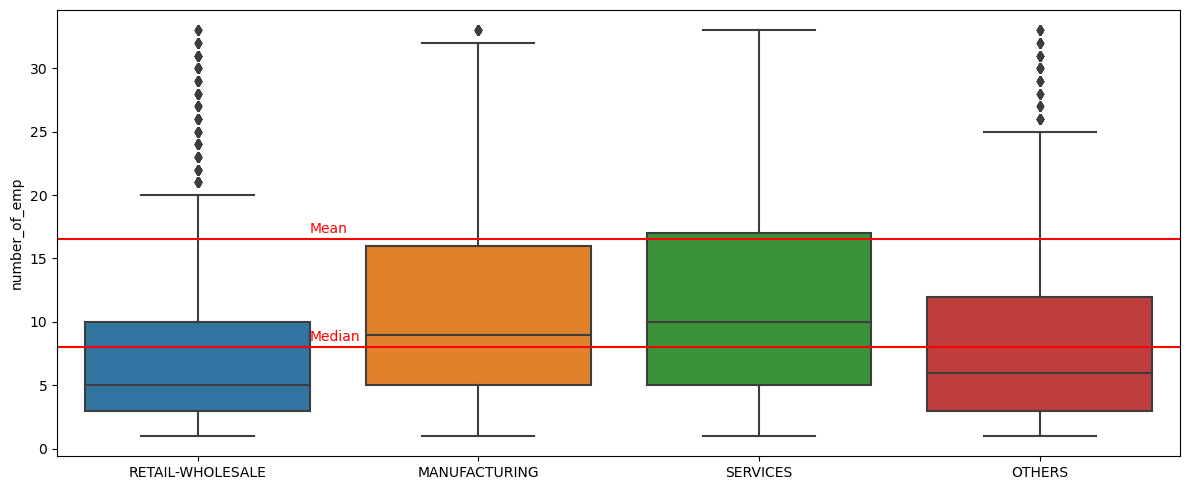

In [11]:
Q1 = df["number_of_emp"].quantile(0.25)
Q3 = df["number_of_emp"].quantile(0.75)

IQR = Q3 - Q1

outlier_threshold = Q3 + 1.5 * IQR

fig, ax = plt.subplots(figsize = (12,5))

sns.boxplot(data = df[df["number_of_emp"] < outlier_threshold], x = "sector", y = "number_of_emp", ax = ax)
ax.axhline(y = df["number_of_emp"].median(), c = "r")
ax.annotate('Median', xy=(0.8, df["number_of_emp"].median()+ 0.1), xytext=(0.4, df["number_of_emp"].median() + 0.5), c= "r")
ax.axhline(y = df["number_of_emp"].mean(), c = "r")
ax.annotate('Mean', xy=(0.8, df["number_of_emp"].mean()+ 0.1), xytext=(0.4, df["number_of_emp"].mean() + 0.5), c= "r")
ax.set_xlabel("")

plt.tight_layout()
plt.show()

There are some extreme outliers in the dataset. Because of these outliers, the mean number of employees is much higher than the median. To preserve the distribution of the dataset, I will avoid using the mean for imputation.

The median number of employees differs noticeably across sectors. I might use the median number of employees in each sector to impute the missing values. Let's check if the situation is the same for regions.

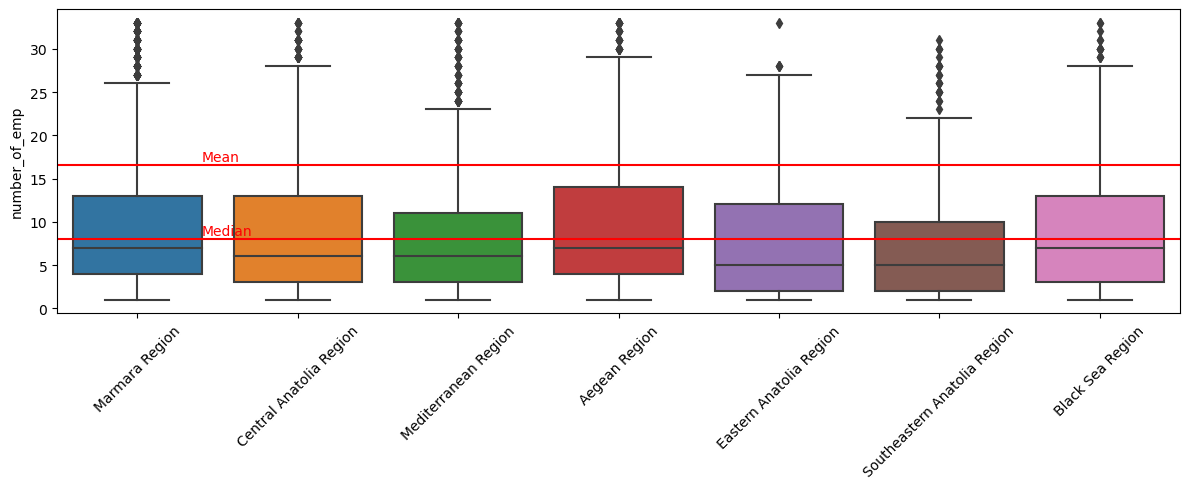

In [12]:
fig, ax = plt.subplots(figsize = (12,5))

sns.boxplot(data = df[df["number_of_emp"] < outlier_threshold], x = "region", y = "number_of_emp", ax = ax)
ax.axhline(y = df["number_of_emp"].median(), c = "r")
ax.annotate('Median', xy=(0.8, df["number_of_emp"].median()+ 0.1), xytext=(0.4, df["number_of_emp"].median() + 0.5), c= "r")
ax.axhline(y = df["number_of_emp"].mean(), c = "r")
ax.annotate('Mean', xy=(0.8, df["number_of_emp"].mean()+ 0.1), xytext=(0.4, df["number_of_emp"].mean() + 0.5), c= "r")
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel("")

plt.tight_layout()
plt.show()

The sector median appears to provide better differentiation for the number of employees. Let's check if combining both sector and region yields even better results.

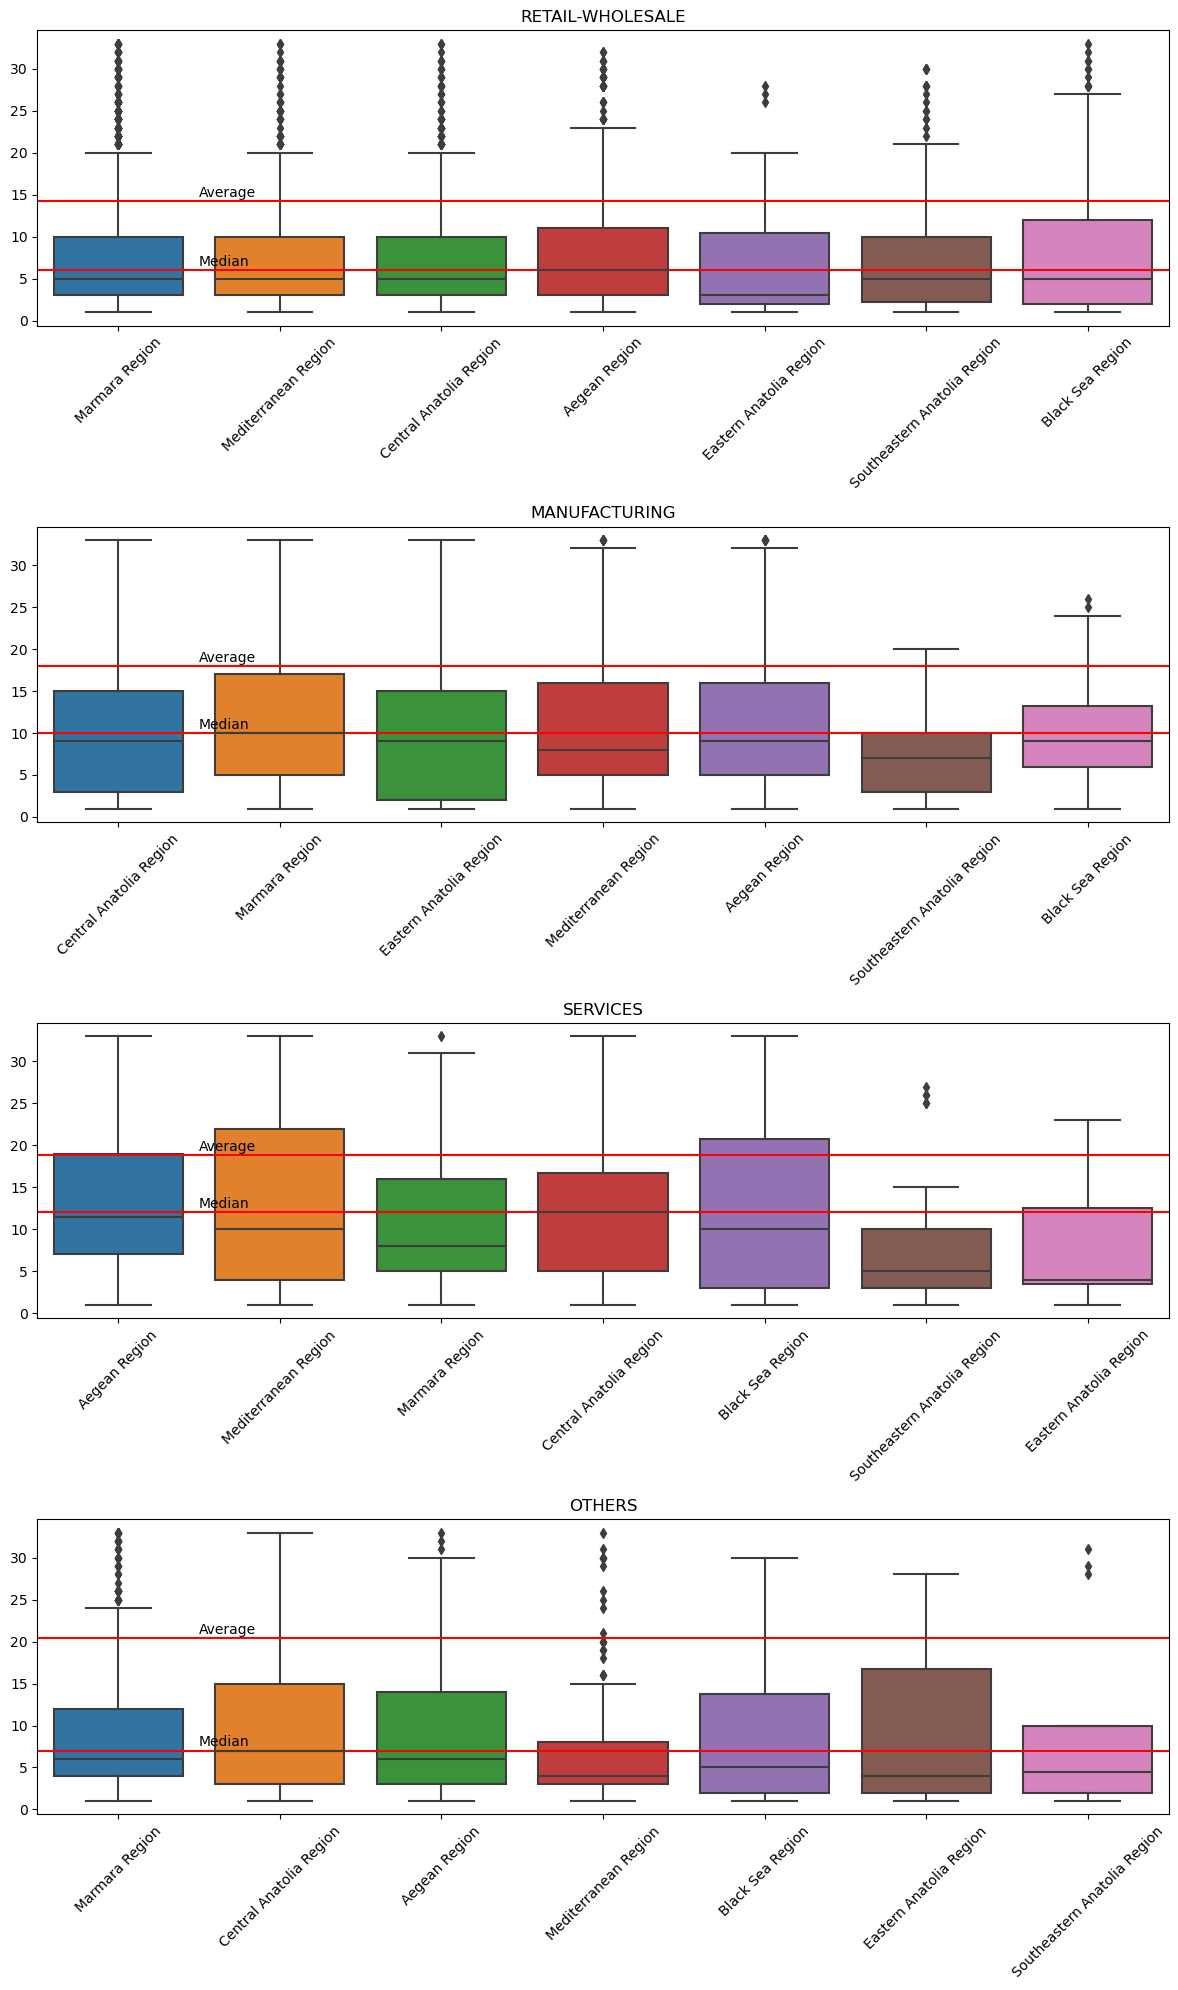

In [13]:
sectors = df["sector"].unique()

fig, ax = plt.subplots(nrows = len(sectors), ncols=1, figsize = (12,5*len(sectors)))

for idx, sector in enumerate(sectors):
    subDf = df[df["sector"] == sector]
    sns.boxplot(data = subDf[subDf["number_of_emp"] < outlier_threshold], x = "region", y = "number_of_emp", ax = ax[idx])
    ax[idx].axhline(y = subDf["number_of_emp"].mean(), c= "r")
    ax[idx].annotate('Average', xy=(0.5, subDf["number_of_emp"].mean()), xytext=(0.5, subDf["number_of_emp"].mean() + 0.5))
    ax[idx].axhline(y = subDf["number_of_emp"].median(), c= "r")
    ax[idx].annotate('Median', xy=(0.5, subDf["number_of_emp"].median()), xytext=(0.5, subDf["number_of_emp"].median() + 0.5))
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].set_title(sector)
    ax[idx].set_xlabel("")
    ax[idx].set_ylabel("")
    
plt.tight_layout()
plt.show()

I will impute missing values in the 'number of employees' column using the median number of employees for each sector, as this method seems to yield better differentiation. I will create a pipeline step for imputation.

In [14]:
class EmployeeNrImputer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self):
        self.fill_values = {}

    def fit(self, X, y=None):
        for sector, group in X.groupby('sector'):
            self.fill_values[sector] = group['number_of_emp'].median() # mean() yerine median() kullanıldı
        return self

    def transform(self, X):
        X_filled = X.copy()
        for sector, fill_value in self.fill_values.items():
            X_filled.loc[X_filled['sector'] == sector, 'number_of_emp'] = X_filled.loc[X_filled['sector'] == sector, 'number_of_emp'].fillna(fill_value)
        return X_filled

In [15]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.isna().sum()

customer_num             0
quarter                  0
sales                 2828
log                      0
establishment_date       0
number_of_emp            0
sector                   0
region                   0
total_risk             116
total_limit            116
totalRiskT1            116
totalRiskT2            116
totalRiskT3            116
totalRiskT4             79
totalLimitT1           116
totalLimitT2           116
totalLimitT3           116
totalLimitT4            79
companyAge               0
dtype: int64

Let's check if the pipeline step works as intended.

In [16]:
df[df.number_of_emp.isna()].head(1)

customer_num quarter  sales         log establishment_date  number_of_emp  \
121  RATI1702FJG  2010Q4    NaN  2010-10-26         2004-10-06            NaN   

               sector          region  total_risk  total_limit  totalRiskT1  \
121  RETAIL-WHOLESALE  Marmara Region    202182.0     724171.0     193393.0   

     totalRiskT2  totalRiskT3  totalRiskT4  totalLimitT1  totalLimitT2  \
121     201175.0     191766.0     185535.0      709466.0      724566.0   

     totalLimitT3  totalLimitT4  companyAge  
121      738943.0      738846.0       13.24

In [17]:
df[df.sector == "RETAIL-WHOLESALE"][["number_of_emp"]].median()

number_of_emp    6.0
dtype: float64

In [19]:
df_transformed.loc[121][["number_of_emp"]]

number_of_emp    6.0
Name: 121, dtype: object

To fill the missing values in the limit and risk columns, I will consider the mean and median limits and risks in different sectors and regions. Given that the data is strongly skewed to the right, I will use only entries with values less than 1.5 times the Interquartile Range (IQR) to visualize the relationship between the number of employees, and the region and sector.

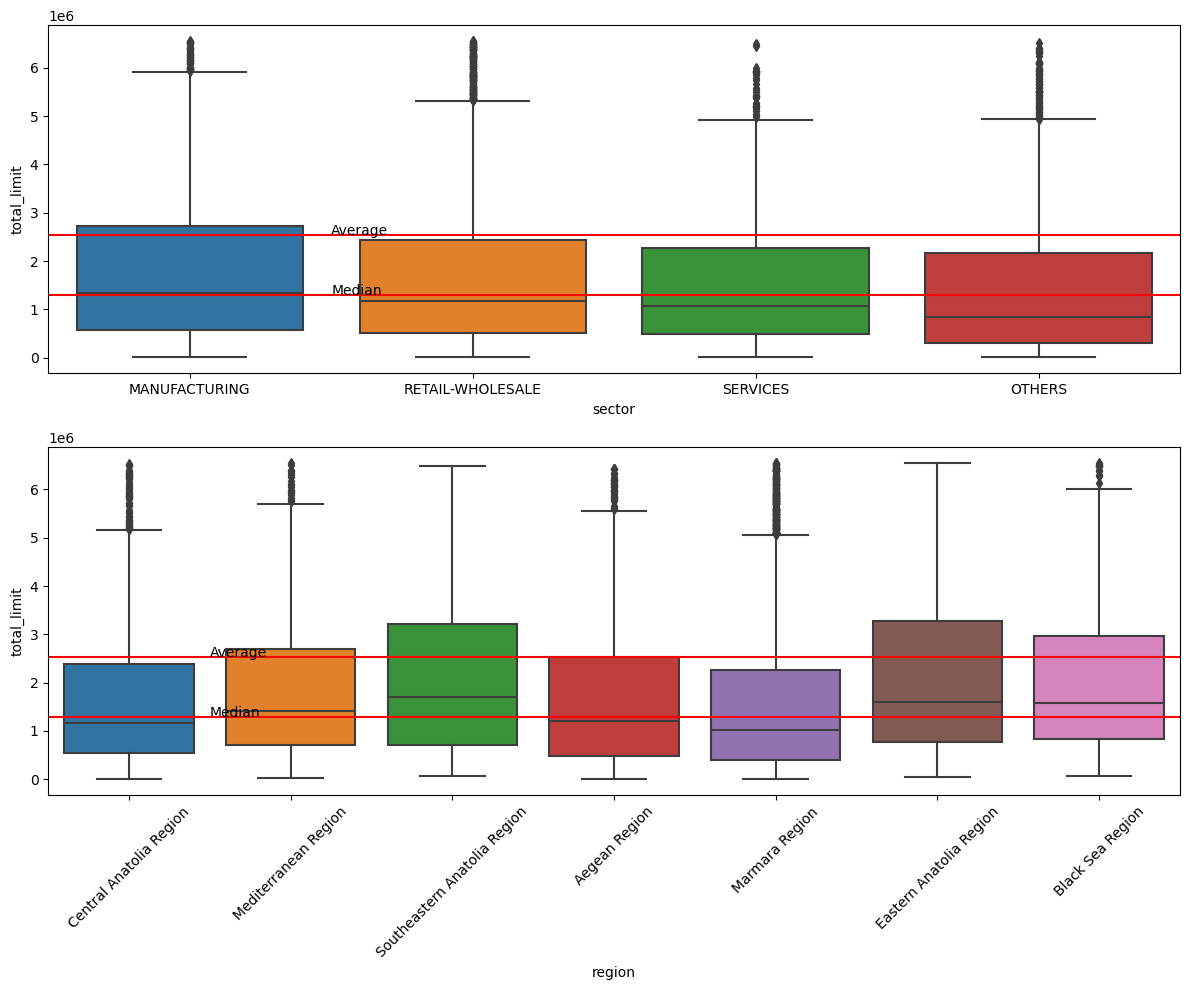

In [20]:
Q1 = df["total_limit"].quantile(0.25)
Q3 = df["total_limit"].quantile(0.75)

IQR = Q3 - Q1

outlier_threshold = Q3 + 1.5 * IQR

fig, ax = plt.subplots(nrows = 2, ncols=1, figsize = (12,10))

sns.boxplot(data = df[df["total_limit"] < outlier_threshold], x = "sector", y = "total_limit", ax = ax[0])
ax[0].axhline(y = df["total_limit"].mean(), c= "r")
ax[0].annotate('Average', xy=(0.5, df["total_limit"].mean()), xytext=(0.5, df["total_limit"].mean() + 0.5))
ax[0].axhline(y = df["total_limit"].median(), c= "r")
ax[0].annotate('Median', xy=(0.5, df["total_limit"].median()), xytext=(0.5, df["total_limit"].median() + 0.5))

sns.boxplot(data = df[df["total_limit"] < outlier_threshold], x = "region", y = "total_limit", ax = ax[1])
ax[1].axhline(y = df["total_limit"].mean(), c= "r")
ax[1].annotate('Average', xy=(0.5, df["total_limit"].mean()), xytext=(0.5, df["total_limit"].mean() + 0.5))
ax[1].axhline(y = df["total_limit"].median(), c= "r")
ax[1].annotate('Median', xy=(0.5, df["total_limit"].median()), xytext=(0.5, df["total_limit"].median() + 0.5))
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Now let's check for the combination of the two.

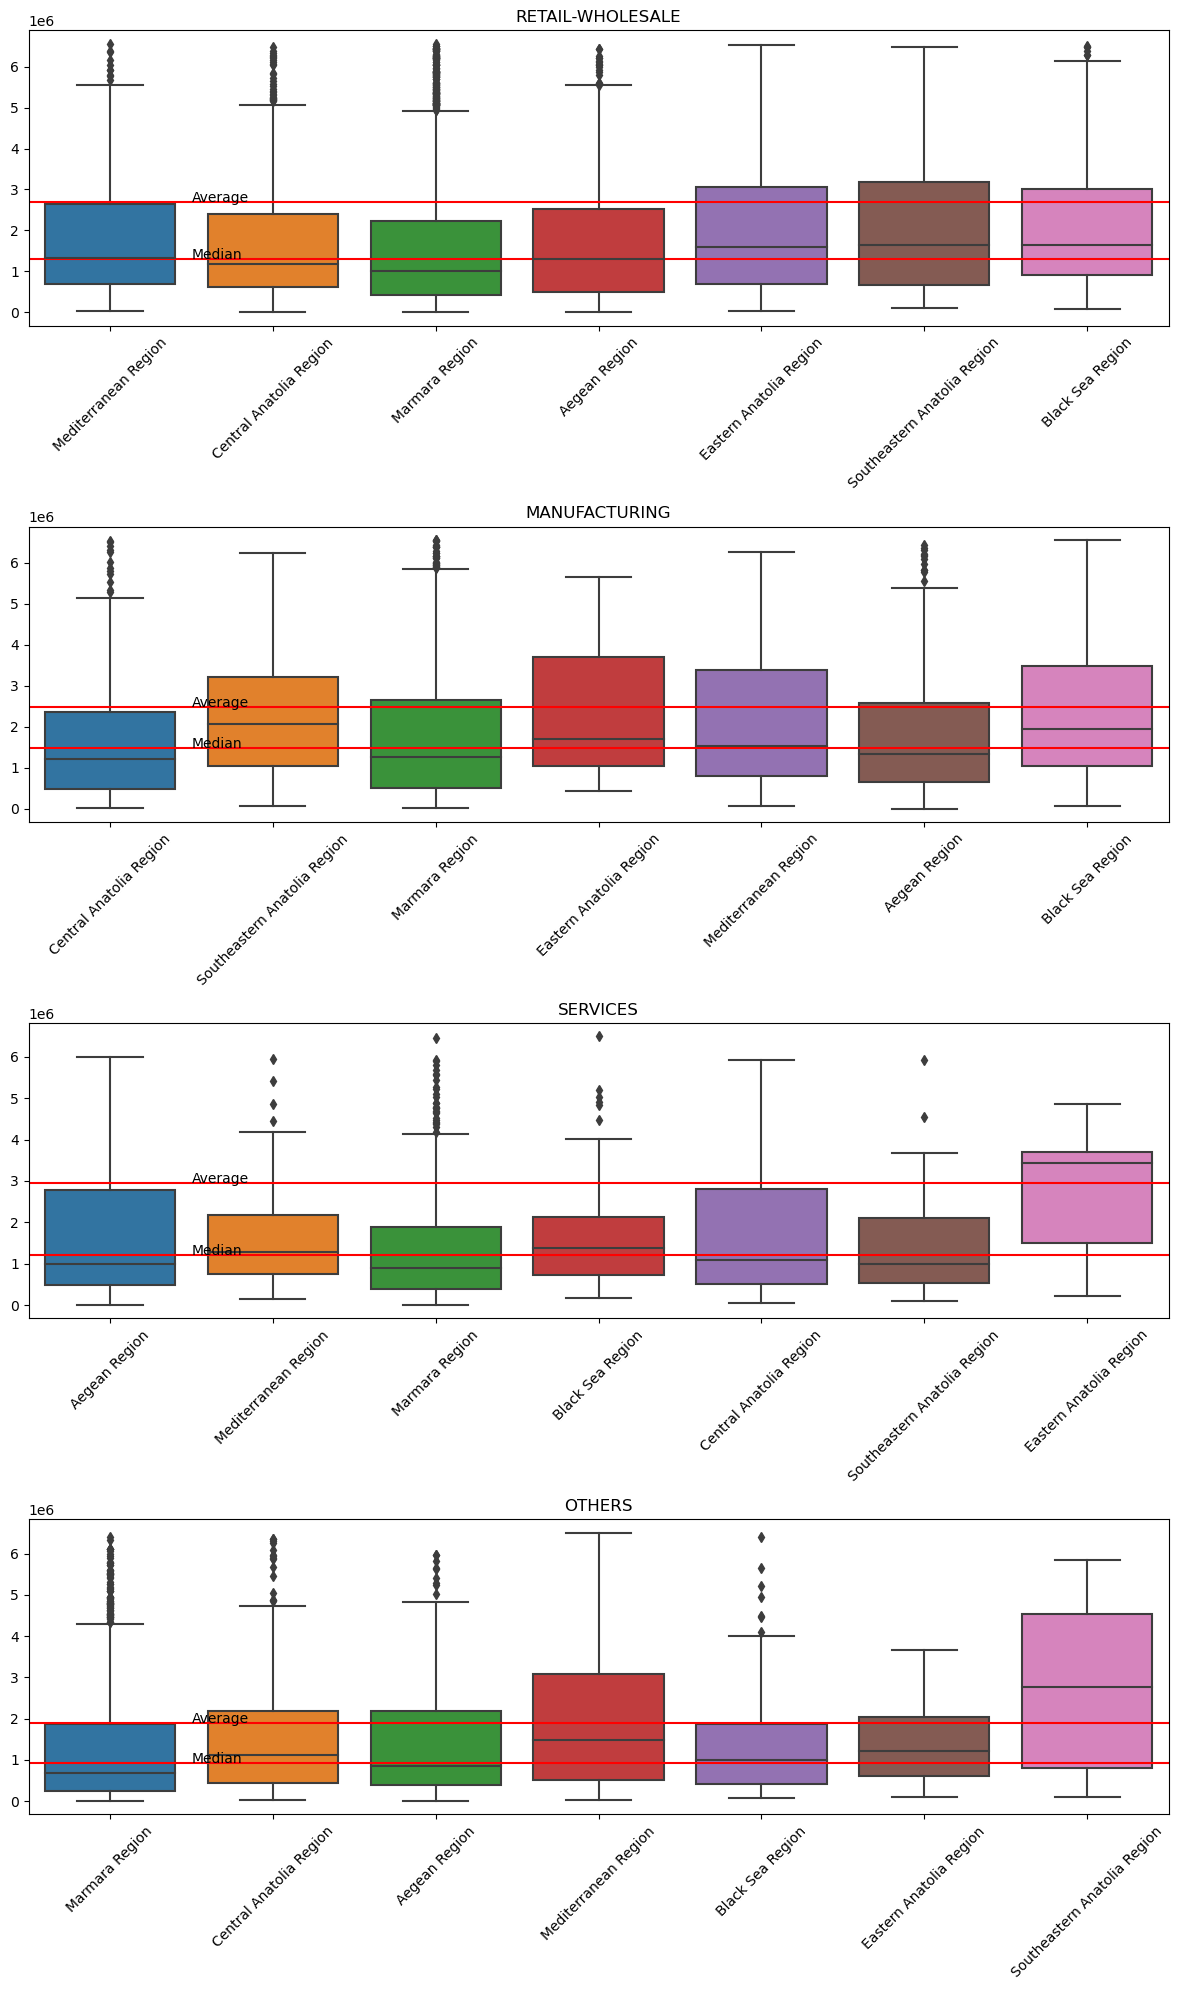

In [21]:
sectors = df["sector"].unique()

fig, ax = plt.subplots(nrows = len(sectors), ncols=1, figsize = (12,5*len(sectors)))

for idx, sector in enumerate(sectors):
    subDf = df[df["sector"] == sector]
    sns.boxplot(data = subDf[subDf["total_limit"] < outlier_threshold], x = "region", y = "total_limit", ax = ax[idx])
    ax[idx].axhline(y = subDf["total_limit"].mean(), c= "r")
    ax[idx].annotate('Average', xy=(0.5, subDf["total_limit"].mean()), xytext=(0.5, subDf["total_limit"].mean() + 0.5))
    ax[idx].axhline(y = subDf["total_limit"].median(), c= "r")
    ax[idx].annotate('Median', xy=(0.5, subDf["total_limit"].median()), xytext=(0.5, subDf["total_limit"].median() + 0.5))
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].set_title(sector)
    ax[idx].set_xlabel("")
    ax[idx].set_ylabel("")
    
plt.tight_layout()
plt.show()

Using both sector and region seems to increase the differentiation. I assume that the risk level of companies would correspond with their limits, but I will check to be sure.

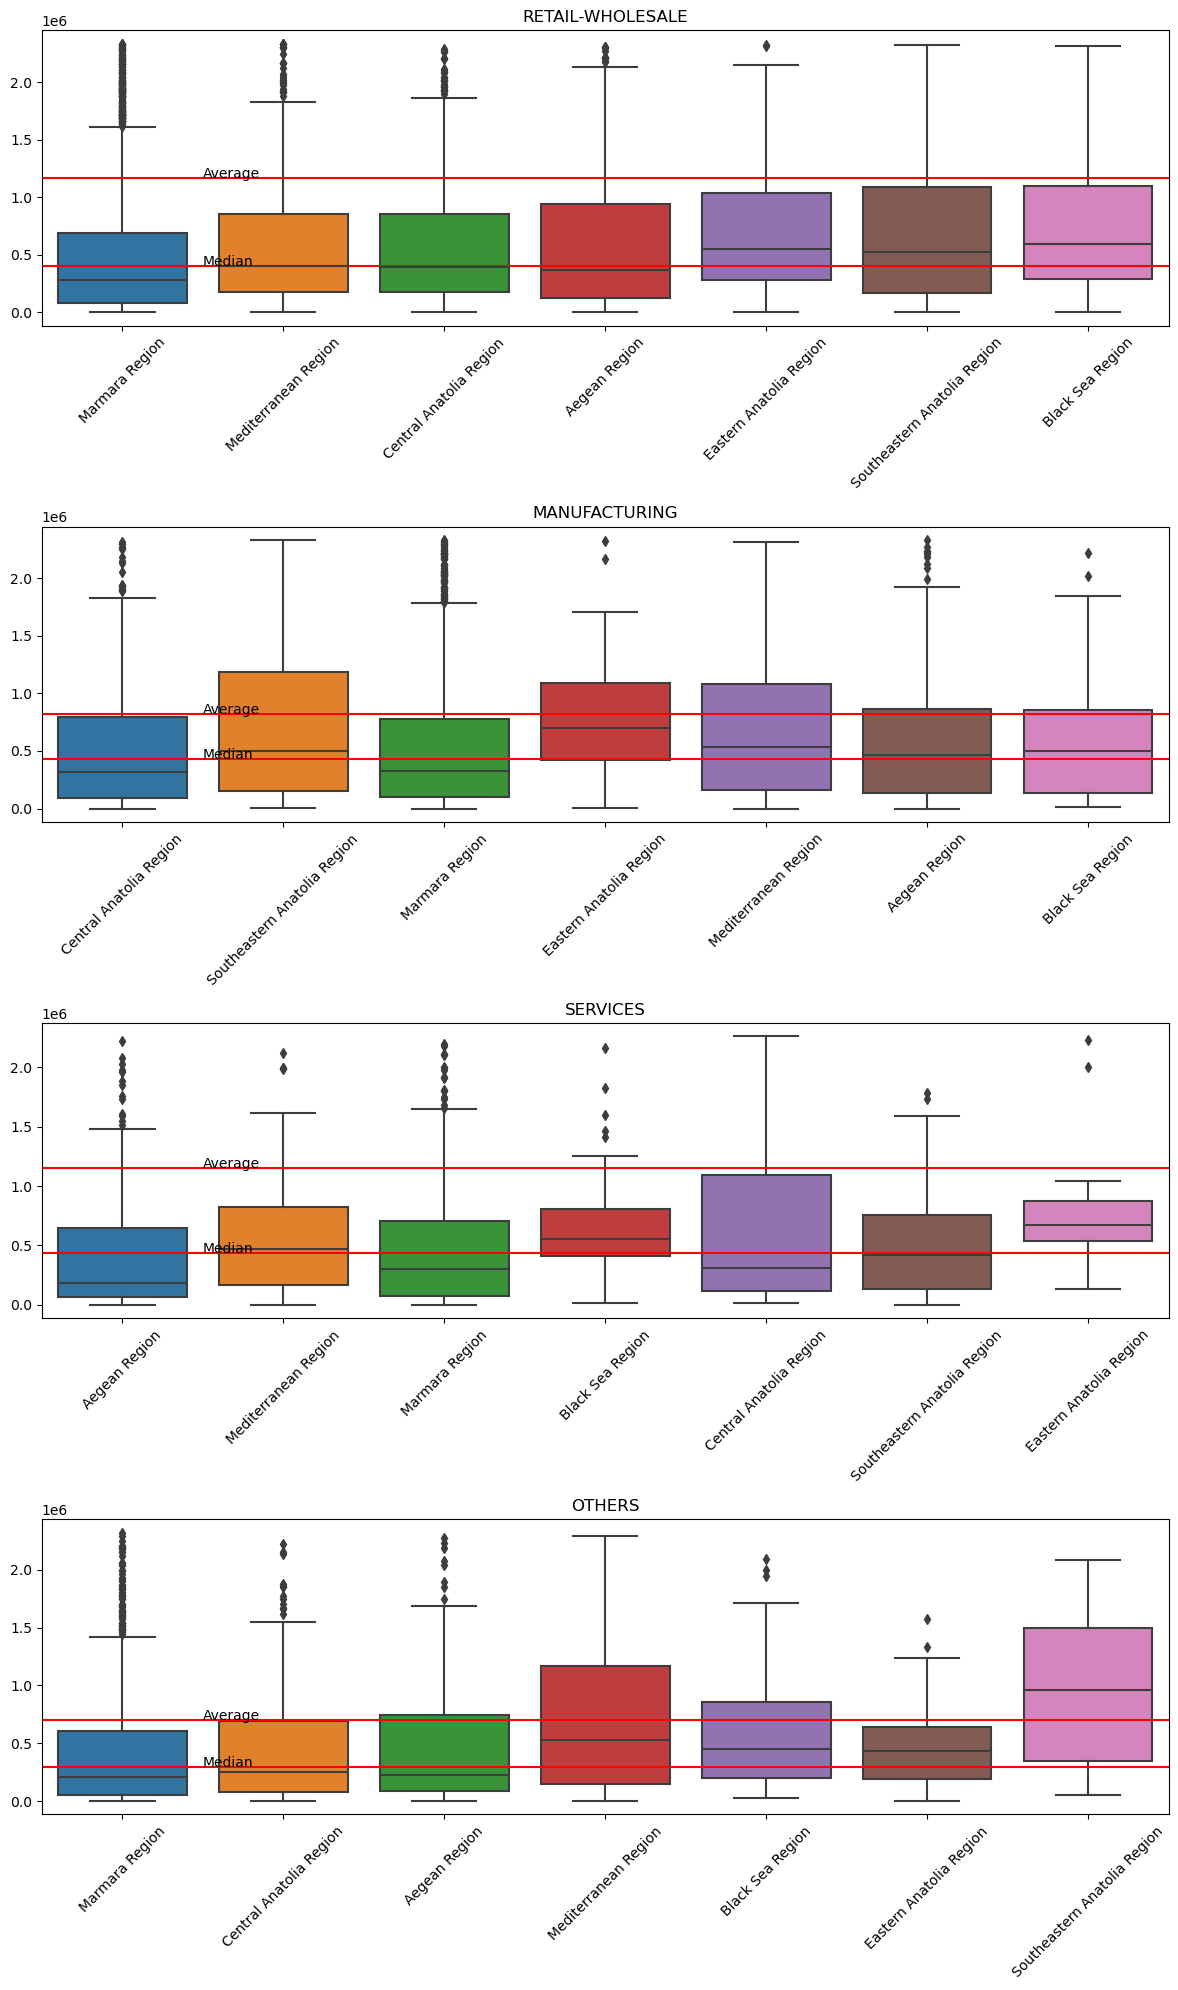

In [22]:
Q1 = df["total_risk"].quantile(0.25)
Q3 = df["total_risk"].quantile(0.75)

IQR = Q3 - Q1

outlier_threshold = Q3 + 1.5 * IQR

sectors = df["sector"].unique()

fig, ax = plt.subplots(nrows = len(sectors), ncols=1, figsize = (12,5*len(sectors)))

for idx, sector in enumerate(sectors):
    subDf = df[df["sector"] == sector]
    sns.boxplot(data = subDf[subDf["total_risk"] < outlier_threshold], x = "region", y = "total_risk", ax = ax[idx])
    ax[idx].axhline(y = subDf["total_risk"].mean(), c= "r")
    ax[idx].annotate('Average', xy=(0.5, subDf["total_risk"].mean()), xytext=(0.5, subDf["total_risk"].mean() + 0.5))
    ax[idx].axhline(y = subDf["total_risk"].median(), c= "r")
    ax[idx].annotate('Median', xy=(0.5, subDf["total_risk"].median()), xytext=(0.5, subDf["total_risk"].median() + 0.5))
    ax[idx].tick_params(axis='x', rotation=45)
    ax[idx].set_title(sector)
    ax[idx].set_xlabel("")
    ax[idx].set_ylabel("")
    
plt.tight_layout()
plt.show()

A combination of sector and region seem to prove a fair amount of differentiation for risk too. I will imputate missing values in total limit and total risk using median using median employee number for each sector.

In [23]:
class LimitRiskImputer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self):
        self.fill_values = {}

    def fit(self, X, y=None):
        for sector_region, group in X.groupby(['sector', 'region']):
            self.fill_values[sector_region] = group[['total_risk', 'total_limit']].mean()
        return self

    def transform(self, X):
        X_filled = X.copy()
        for sector_region, fill_value in self.fill_values.items():
            X_filled.loc[(X_filled['sector'] == sector_region[0]) & (X_filled['region'] == sector_region[1]), ['total_risk', 'total_limit']] = X_filled.loc[(X_filled['sector'] == sector_region[0]) & (X_filled['region'] == sector_region[1]), ['total_risk', 'total_limit']].fillna(fill_value)
        return X_filled

In [24]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.isna().sum()

customer_num             0
quarter                  0
sales                 2828
log                      0
establishment_date       0
number_of_emp            0
sector                   0
region                   0
total_risk               0
total_limit              0
totalRiskT1            116
totalRiskT2            116
totalRiskT3            116
totalRiskT4             79
totalLimitT1           116
totalLimitT2           116
totalLimitT3           116
totalLimitT4            79
companyAge               0
dtype: int64

Let's chek if it works as intended.

In [25]:
df[df.total_limit.isna()].head(1)

customer_num quarter  sales         log establishment_date  number_of_emp  \
48  RATI6245IHU  2010Q4    0.0  2010-12-05         2008-02-04            1.0   

              sector          region  total_risk  total_limit  totalRiskT1  \
48  RETAIL-WHOLESALE  Marmara Region         NaN          NaN          NaN   

    totalRiskT2  totalRiskT3  totalRiskT4  totalLimitT1  totalLimitT2  \
48          NaN          NaN          NaN           NaN           NaN   

    totalLimitT3  totalLimitT4  companyAge  
48           NaN           NaN        9.91

In [26]:
df[(df.sector == "RETAIL-WHOLESALE") & (df.region == "Marmara Region")][["total_risk","total_limit"]].mean()

total_risk     1.394039e+06
total_limit    2.868047e+06
dtype: float64

In [27]:
df_transformed.loc[49][["total_risk","total_limit"]]

total_risk     1433685.0
total_limit    4405662.0
Name: 49, dtype: object

It works beautifully. Let's create the class for creating additional features.

I will start with percentage change in limit and risk. There are many NaN values in the limit and risk info from the previous periods. I will asume percentage change for the related period is zero.

In [28]:
class ChangeCalculator(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for i in range(1, 5):
            X_transformed[f"totalLimit_pctchange_{i}period"] = (X_transformed["total_limit"] - X_transformed[f"totalLimitT{i}"])/X_transformed[f"totalLimitT{i}"]*100
            X_transformed[f"totalRisk_pctchange_{i}period"] = (X_transformed["total_risk"] - X_transformed[f"totalRiskT{i}"])/X_transformed[f"totalLimitT{i}"]*100

            # NaN, Inf, -Inf check and replacement
            change_cols = [f"totalLimit_pctchange_{i}period", f"totalRisk_pctchange_{i}period"]
            for col in change_cols:
                X_transformed.loc[(X_transformed[col].isna()) | (X_transformed[col] == np.inf) | (X_transformed[col] == -np.inf), col] = 0
        
        # Drop the original columns
        columns_to_drop = [f"totalRiskT{i}" for i in range(1, 5)] + [f"totalLimitT{i}" for i in range(1, 5)]
        X_transformed = X_transformed.drop(columns=columns_to_drop)
        
        return X_transformed

In [29]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.isna().sum()

customer_num                       0
quarter                            0
sales                           2828
log                                0
establishment_date                 0
number_of_emp                      0
sector                             0
region                             0
total_risk                         0
total_limit                        0
companyAge                         0
totalLimit_pctchange_1period       0
totalRisk_pctchange_1period        0
totalLimit_pctchange_2period       0
totalRisk_pctchange_2period        0
totalLimit_pctchange_3period       0
totalRisk_pctchange_3period        0
totalLimit_pctchange_4period       0
totalRisk_pctchange_4period        0
dtype: int64

In [30]:
myArr = ((df["total_limit"] - df[f"totalLimitT1"])/df[f"totalLimitT1"]).fillna(0).values
transformedArr = df_transformed.totalLimit_pctchange_1period.values

if (myArr - transformedArr).sum() == 0:
    print("Works as intended!")

In [31]:
df_transformed.isna().sum()

customer_num                       0
quarter                            0
sales                           2828
log                                0
establishment_date                 0
number_of_emp                      0
sector                             0
region                             0
total_risk                         0
total_limit                        0
companyAge                         0
totalLimit_pctchange_1period       0
totalRisk_pctchange_1period        0
totalLimit_pctchange_2period       0
totalRisk_pctchange_2period        0
totalLimit_pctchange_3period       0
totalRisk_pctchange_3period        0
totalLimit_pctchange_4period       0
totalRisk_pctchange_4period        0
dtype: int64

In this point, all missing values are filled. Now I will create a class to add risk to limit ratio in an additional column.

In [32]:
class RiskLimitRatioCalculator(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        # Avoid division by zero by adding a small constant
        X_transformed['risk_limit_ratio'] = X_transformed['total_risk'] / (X_transformed['total_limit'] + np.finfo(float).eps)
        return X_transformed

In [33]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.head()

customer_num quarter  sales         log establishment_date  number_of_emp  \
0  RATI9590GZD  2017Q4    NaN  2017-06-14         2001-01-26            8.0   
1  RATI2539VHR  2015Q4    0.0  2015-02-20         1994-03-08           21.0   
2  RATI4481GNN  2010Q4    0.0  2010-12-07         1996-01-27            7.0   
3  RATI4948THA  2012Q4    1.0  2012-10-02         2004-04-07           34.0   
4  RATI8841WYZ  2013Q4    0.0  2013-05-27         2006-04-24           15.0   

             sector                        region  total_risk  total_limit  \
0  RETAIL-WHOLESALE                Marmara Region     70614.0    7000362.0   
1     MANUFACTURING       Central Anatolia Region    682662.0    2353551.0   
2  RETAIL-WHOLESALE          Mediterranean Region    115745.0     592723.0   
3     MANUFACTURING  Southeastern Anatolia Region     39234.0    2470770.0   
4          SERVICES                 Aegean Region     70894.0     505769.0   

   companyAge  totalLimit_pctchange_1period  totalRisk_pctchange_1period  \
0       16.94                     11.124213                    -0.101435   
1       23.83                      7.525134                     0.308520   
2       21.94                      6.341298                     0.508093   
3       13.74                      2.009498                     0.003551   
4       11.70                      2.042591                     0.112379   

   totalLimit_pctchange_2period  totalRisk_pctchange_2period  \
0                      1.936044                    -0.063896   
1                      2.374595                    -1.149085   
2                     16.793400                     2.092820   
3                      4.109616                     0.050353   
4                     -1.050788                     1.510154   

   totalLimit_pctchange_3period  totalRisk_pctchange_3period  \
0                      0.931972                     0.039722   
1                     10.096472                    -2.592018   
2                     19.174317                     0.912823   
3                      7.322873                     0.084789   
4                     -8.291946                     1.330918   

   totalLimit_pctchange_4period  totalRisk_pctchange_4period  risk_limit_ratio  
0                     19.449951                     0.397099          0.010087  
1                    -22.461292                    -0.016176          0.290056  
2                     13.518239                    -0.108592          0.195277  
3                     19.254520                     0.164732          0.015879  
4                     -9.045640                    -1.799597          0.140171

In [34]:
idx = df[~df.total_risk.isna()].index
myArr = (df.loc[idx]["total_risk"]/df.loc[idx][f"total_limit"]).values
transformedArr = df_transformed.loc[idx].risk_limit_ratio.values

if (myArr - transformedArr).sum() == 0:
    print("Works as intended!")

Works as intended!


I no longer need the customer number, log, and establishment date, so I will remove them.

In [35]:
df.drop(["customer_num","log","establishment_date"], axis = 1, inplace = True)
df.head()

quarter  sales  number_of_emp            sector  \
0  2017Q4    NaN            8.0  RETAIL-WHOLESALE   
1  2015Q4    0.0           21.0     MANUFACTURING   
2  2010Q4    0.0            7.0  RETAIL-WHOLESALE   
3  2012Q4    1.0           34.0     MANUFACTURING   
4  2013Q4    0.0           15.0          SERVICES   

                         region  total_risk  total_limit  totalRiskT1  \
0                Marmara Region     70614.0    7000362.0      77004.0   
1       Central Anatolia Region    682662.0    2353551.0     675909.0   
2          Mediterranean Region    115745.0     592723.0     112913.0   
3  Southeastern Anatolia Region     39234.0    2470770.0      39148.0   
4                 Aegean Region     70894.0     505769.0      70337.0   

   totalRiskT2  totalRiskT3  totalRiskT4  totalLimitT1  totalLimitT2  \
0      75002.0      67859.0      47342.0     6299583.0     6867406.0   
1     709079.0     738072.0     683153.0     2188838.0     2298960.0   
2     105124.0     111205.0     116312.0      557378.0      507497.0   
3      38039.0      37282.0      35821.0     2422098.0     2373239.0   
4      63175.0      63554.0      80901.0      495645.0      511140.0   

   totalLimitT3  totalLimitT4  companyAge  
0     6935723.0     5860498.0       16.94  
1     2137717.0     3035324.0       23.83  
2      497358.0      522139.0       21.94  
3     2302184.0     2071846.0       13.74  
4      551499.0      556069.0       11.70

Necessary steps to build data tu build model on is complete. Now I will evaluate the features using the transformed data.

In [36]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.dropna(inplace = True)
df_transformed.head()

quarter  sales  number_of_emp            sector  \
1  2015Q4    0.0           21.0     MANUFACTURING   
2  2010Q4    0.0            7.0  RETAIL-WHOLESALE   
3  2012Q4    1.0           34.0     MANUFACTURING   
4  2013Q4    0.0           15.0          SERVICES   
6  2017Q4    0.0            8.0     MANUFACTURING   

                         region  total_risk  total_limit  companyAge  \
1       Central Anatolia Region    682662.0    2353551.0       23.83   
2          Mediterranean Region    115745.0     592723.0       21.94   
3  Southeastern Anatolia Region     39234.0    2470770.0       13.74   
4                 Aegean Region     70894.0     505769.0       11.70   
6                Marmara Region    107401.0     873091.0       17.55   

   totalLimit_pctchange_1period  totalRisk_pctchange_1period  \
1                      7.525134                     0.308520   
2                      6.341298                     0.508093   
3                      2.009498                     0.003551   
4                      2.042591                     0.112379   
6                      6.347673                    -0.386490   

   totalLimit_pctchange_2period  totalRisk_pctchange_2period  \
1                      2.374595                    -1.149085   
2                     16.793400                     2.092820   
3                      4.109616                     0.050353   
4                     -1.050788                     1.510154   
6                     10.740872                    -1.827097   

   totalLimit_pctchange_3period  totalRisk_pctchange_3period  \
1                     10.096472                    -2.592018   
2                     19.174317                     0.912823   
3                      7.322873                     0.084789   
4                     -8.291946                     1.330918   
6                     17.861516                    -0.467752   

   totalLimit_pctchange_4period  totalRisk_pctchange_4period  risk_limit_ratio  
1                    -22.461292                    -0.016176          0.290056  
2                     13.518239                    -0.108592          0.195277  
3                     19.254520                     0.164732          0.015879  
4                     -9.045640                    -1.799597          0.140171  
6                     10.171853                    -0.887845          0.123012

In [37]:
df_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8507 entries, 1 to 11334
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   quarter                       8507 non-null   object 
 1   sales                         8507 non-null   float64
 2   number_of_emp                 8507 non-null   float64
 3   sector                        8507 non-null   object 
 4   region                        8507 non-null   object 
 5   total_risk                    8507 non-null   float64
 6   total_limit                   8507 non-null   float64
 7   companyAge                    8507 non-null   float64
 8   totalLimit_pctchange_1period  8507 non-null   float64
 9   totalRisk_pctchange_1period   8507 non-null   float64
 10  totalLimit_pctchange_2period  8507 non-null   float64
 11  totalRisk_pctchange_2period   8507 non-null   float64
 12  totalLimit_pctchange_3period  8507 non-null   float64
 13  totalRi

In [38]:
cat_features = ["sector", "region"]
num_features = df_transformed.select_dtypes(include=["int64", "float64"]).columns.values

print("Categorical Features: ", cat_features)
print("\nNumerical Features: ", num_features)

Categorical Features:  ['sector', 'region']

Numerical Features:  ['sales' 'number_of_emp' 'total_risk' 'total_limit' 'companyAge'
 'totalLimit_pctchange_1period' 'totalRisk_pctchange_1period'
 'totalLimit_pctchange_2period' 'totalRisk_pctchange_2period'
 'totalLimit_pctchange_3period' 'totalRisk_pctchange_3period'
 'totalLimit_pctchange_4period' 'totalRisk_pctchange_4period'
 'risk_limit_ratio']


## Categorical Features

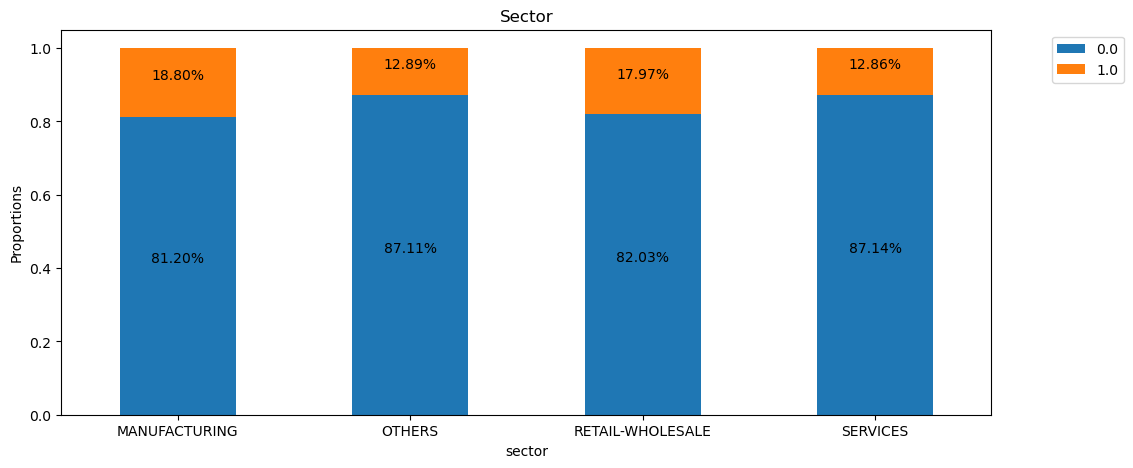

In [39]:
grouped = df_transformed.groupby(['sector', 'sales']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12,5))
grouped_normalized.plot(kind='bar', stacked=True, ax=ax)
plt.ylabel('Proportions')
plt.title('Sector')
plt.xticks(rotation=0)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, "{:.2%}".format(height), ha='center', va='bottom')

plt.show()

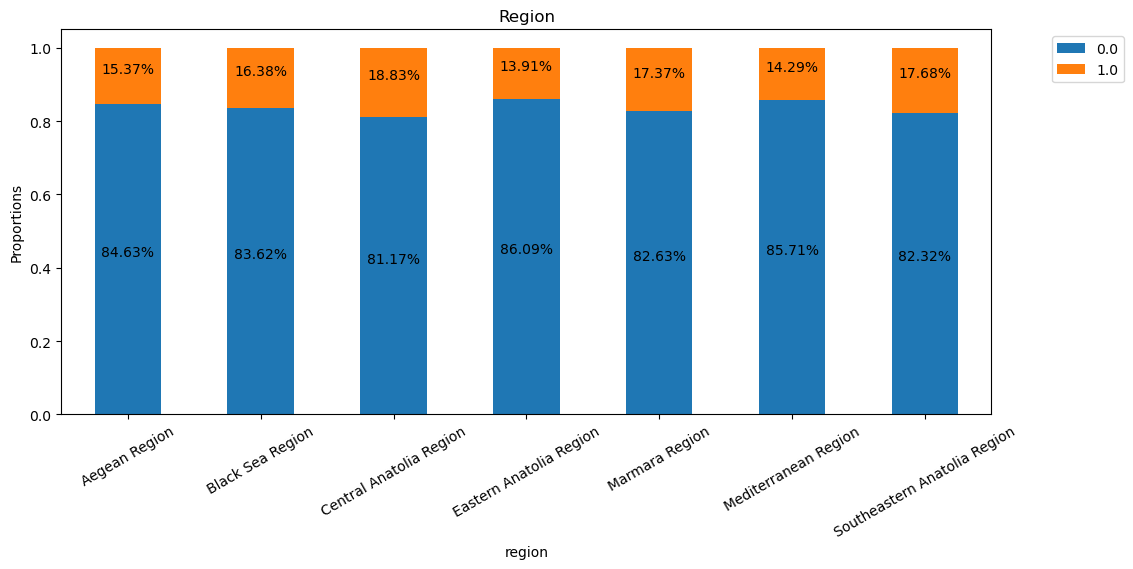

In [40]:
grouped = df_transformed.groupby(['region', 'sales']).size().unstack()
grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(12,5))
grouped_normalized.plot(kind='bar', stacked=True, ax=ax)
plt.ylabel('Proportions')
plt.title('Region')
plt.xticks(rotation=30)

plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, "{:.2%}".format(height), ha='center', va='bottom')

plt.show()

Categorical Features does'nt seem to have a great amout of predictive power on their own. I will check for their combinations.

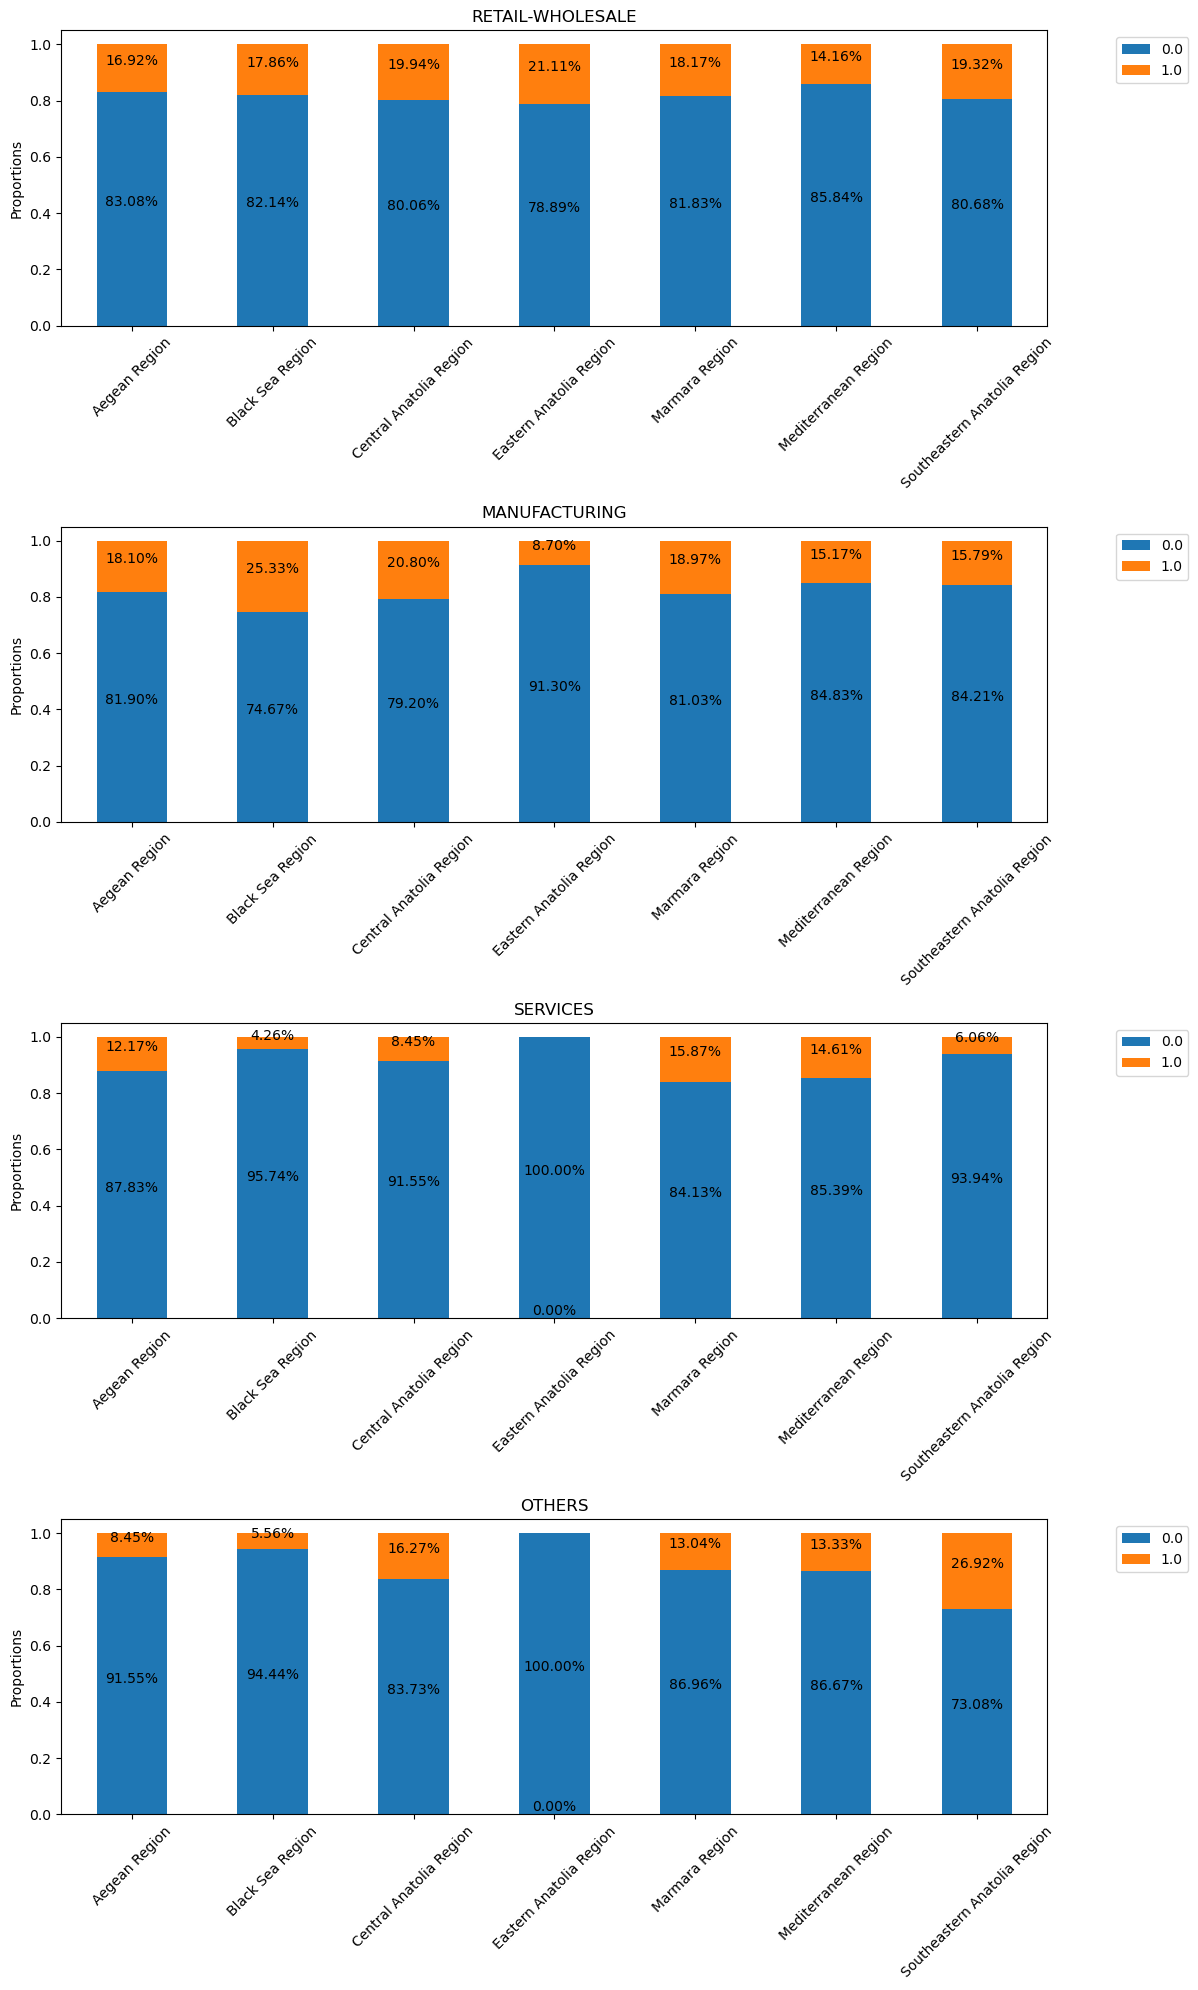

In [41]:
sectors = df["sector"].unique()

fig, ax = plt.subplots(nrows = len(sectors), ncols=1, figsize = (12,5*len(sectors)))

for idx, sector in enumerate(sectors):
    subDf = df[df["sector"] == sector]
    grouped = subDf.groupby(['region', 'sales']).size().unstack()
    grouped_normalized = grouped.div(grouped.sum(axis=1), axis=0)

    grouped_normalized.plot(kind='bar', stacked=True, ax=ax[idx])
    ax[idx].set_ylabel('Proportions')
    ax[idx].set_xlabel("")
    ax[idx].set_title(sector)
    ax[idx].tick_params(axis='x', rotation=45)

    ax[idx].legend(loc='upper right', bbox_to_anchor=(1.15, 1))

    for rect in ax[idx].patches:
        height = rect.get_height()
        ax[idx].text(rect.get_x() + rect.get_width() / 2, rect.get_y() + height / 2, "{:.2%}".format(height), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

Instead of one-hot encoding all categorical features, I will create some costım columns.

1- OTHERS_Southeastern: This column will have a value of 1 when the sector is 'OTHERS' and the region is 'Southeastern Anatolia Region', and 0 otherwise.

2- RETAIL_Eastern: This column will have a value of 1 when the sector is 'RETAIL-WHOLESALE' and the region is 'Eastern Anatolia Region', and 0 otherwise.

3- MANUFACTURING_BlackSea_Central: This column will have a value of 1 when the sector is 'MANUFACTURING' and the region is either 'Black Sea Region' or 'Central Anatolia Region', and 0 otherwise.

In [42]:
class CategoricalGenerator(base.BaseEstimator, base.TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        X_transformed['OTHERS_Southeastern'] = ((X_transformed['sector'] == 'OTHERS') & 
                                  (X_transformed['region'] == 'Southeastern Anatolia Region')).astype(int)
        
        X_transformed['RETAIL_Eastern'] = ((X_transformed['sector'] == 'RETAIL-WHOLESALE') & 
                                  (X_transformed['region'] == 'Eastern Anatolia Region')).astype(int)
        
        X_transformed['MANUFACTURING_BlackSea_Central'] = ((X_transformed['sector'] == 'MANUFACTURING') & 
                                  (X_transformed['region'].isin(['Black Sea Region', 'Central Anatolia Region']))).astype(int)

        return X_transformed

In [43]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator())
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.dropna(inplace = True)
df_transformed.head()

quarter  sales  number_of_emp            sector  \
1  2015Q4    0.0           21.0     MANUFACTURING   
2  2010Q4    0.0            7.0  RETAIL-WHOLESALE   
3  2012Q4    1.0           34.0     MANUFACTURING   
4  2013Q4    0.0           15.0          SERVICES   
6  2017Q4    0.0            8.0     MANUFACTURING   

                         region  total_risk  total_limit  companyAge  \
1       Central Anatolia Region    682662.0    2353551.0       23.83   
2          Mediterranean Region    115745.0     592723.0       21.94   
3  Southeastern Anatolia Region     39234.0    2470770.0       13.74   
4                 Aegean Region     70894.0     505769.0       11.70   
6                Marmara Region    107401.0     873091.0       17.55   

   totalLimit_pctchange_1period  totalRisk_pctchange_1period  \
1                      7.525134                     0.308520   
2                      6.341298                     0.508093   
3                      2.009498                     0.003551   
4                      2.042591                     0.112379   
6                      6.347673                    -0.386490   

   totalLimit_pctchange_2period  totalRisk_pctchange_2period  \
1                      2.374595                    -1.149085   
2                     16.793400                     2.092820   
3                      4.109616                     0.050353   
4                     -1.050788                     1.510154   
6                     10.740872                    -1.827097   

   totalLimit_pctchange_3period  totalRisk_pctchange_3period  \
1                     10.096472                    -2.592018   
2                     19.174317                     0.912823   
3                      7.322873                     0.084789   
4                     -8.291946                     1.330918   
6                     17.861516                    -0.467752   

   totalLimit_pctchange_4period  totalRisk_pctchange_4period  \
1                    -22.461292                    -0.016176   
2                     13.518239                    -0.108592   
3                     19.254520                     0.164732   
4                     -9.045640                    -1.799597   
6                     10.171853                    -0.887845   

   risk_limit_ratio  OTHERS_Southeastern  RETAIL_Eastern  \
1          0.290056                    0               0   
2          0.195277                    0               0   
3          0.015879                    0               0   
4          0.140171                    0               0   
6          0.123012                    0               0   

   MANUFACTURING_BlackSea_Central  
1                               1  
2                               0  
3                               0  
4                               0  
6                               0

New step works as intended.

## Numerical Features

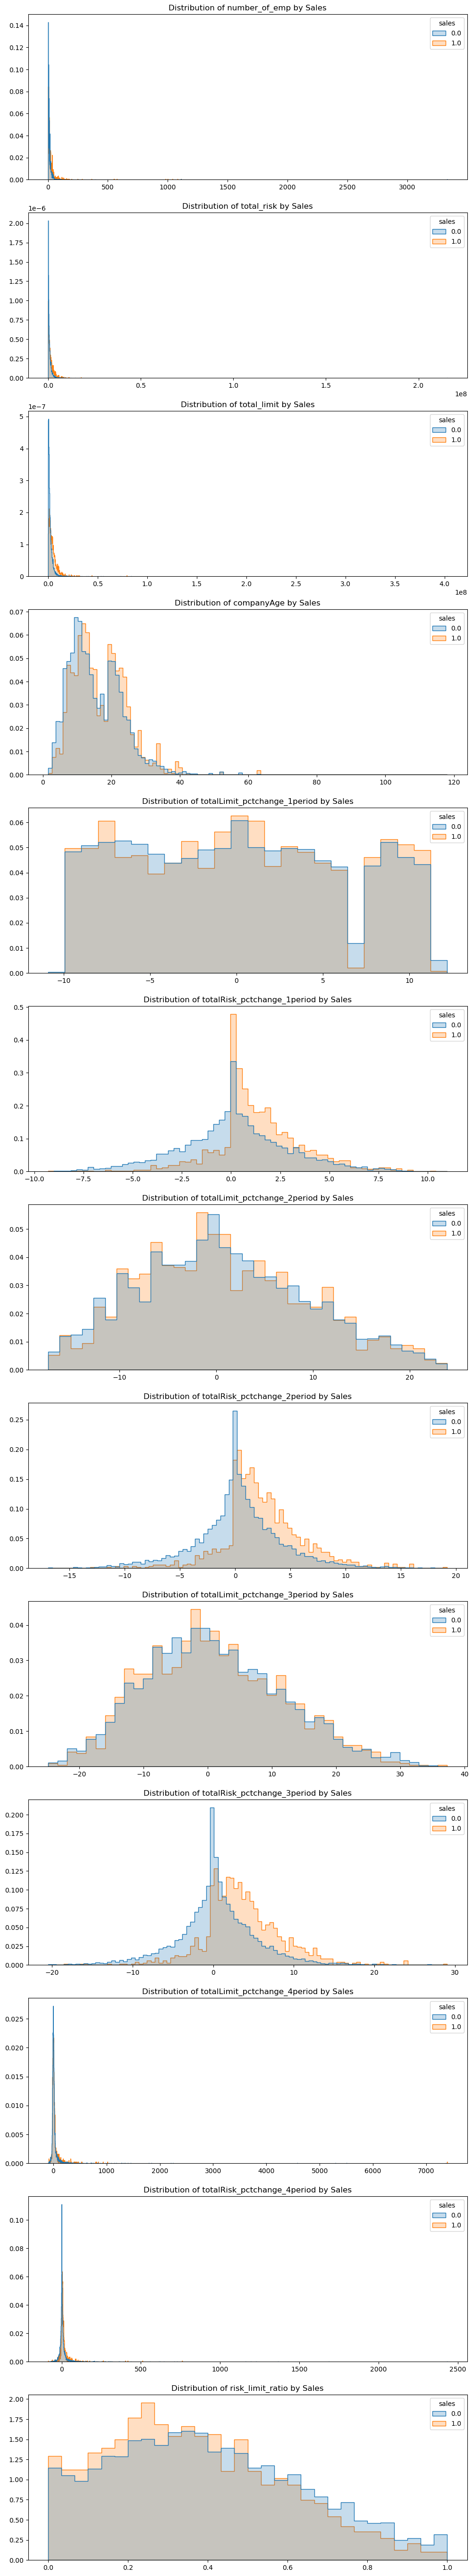

In [44]:
fig, ax = plt.subplots(len(num_features[1:]), 1, figsize=(12 , 5 * len(num_features)))
for i, feature in enumerate(num_features[1:]):
    sns.histplot(data=df_transformed, x=feature, hue='sales', element='step', stat='density', common_norm=False, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature} by Sales')
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
plt.show()

## Observations
- The number of employees, total risk, and total limit all have a right-skewed distribution. I will try a log transformation for these columns.
- The percentage changes in limit and risk, as well as company age, have some severe extreme values. I plan to suppress them using the IQR range.

In [45]:
log_columns = ['number_of_emp', 'total_risk', 'total_limit']
IQR_columns = ["companyAge", 'totalLimit_pctchange_1period', 'totalRisk_pctchange_1period', 'totalLimit_pctchange_2period', 'totalRisk_pctchange_2period', 'totalLimit_pctchange_3period', 'totalRisk_pctchange_3period', 'totalLimit_pctchange_4period', 'totalRisk_pctchange_4period']

In [46]:
class LogTransformer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            X_copy[col] = np.log1p(X_copy[col].clip(lower=0))
        return X_copy

In [47]:
class OutlierClipper(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.clip_values_ = {}

    def fit(self, X, y=None):
        for col in self.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            self.clip_values_[col] = (lower_bound, upper_bound)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in self.columns:
            lower_bound, upper_bound = self.clip_values_[col]
            X_copy[col] = X_copy[col].clip(lower_bound, upper_bound)
        return X_copy


In [48]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator()),
    ('outlier_clipper', OutlierClipper(IQR_columns)),
    ('log_transformer', LogTransformer(log_columns))
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.head()

quarter  sales  number_of_emp            sector  \
0  2017Q4    NaN       2.197225  RETAIL-WHOLESALE   
1  2015Q4    0.0       3.091042     MANUFACTURING   
2  2010Q4    0.0       2.079442  RETAIL-WHOLESALE   
3  2012Q4    1.0       3.555348     MANUFACTURING   
4  2013Q4    0.0       2.772589          SERVICES   

                         region  total_risk  total_limit  companyAge  \
0                Marmara Region   11.164998    15.761473       16.94   
1       Central Anatolia Region   13.433757    14.671436       23.83   
2          Mediterranean Region   11.659153    13.292484       21.94   
3  Southeastern Anatolia Region   10.577324    14.720041       13.74   
4                 Aegean Region   11.168955    13.133837       11.70   

   totalLimit_pctchange_1period  totalRisk_pctchange_1period  \
0                     11.124213                    -0.101435   
1                      7.525134                     0.308520   
2                      6.341298                     0.508093   
3                      2.009498                     0.003551   
4                      2.042591                     0.112379   

   totalLimit_pctchange_2period  totalRisk_pctchange_2period  \
0                      1.936044                    -0.063896   
1                      2.374595                    -1.149085   
2                     16.793400                     2.092820   
3                      4.109616                     0.050353   
4                     -1.050788                     1.510154   

   totalLimit_pctchange_3period  totalRisk_pctchange_3period  \
0                      0.931972                     0.039722   
1                     10.096472                    -2.592018   
2                     19.174317                     0.912823   
3                      7.322873                     0.084789   
4                     -8.291946                     1.330918   

   totalLimit_pctchange_4period  totalRisk_pctchange_4period  \
0                     19.449951                     0.397099   
1                    -22.461292                    -0.016176   
2                     13.518239                    -0.108592   
3                     19.254520                     0.164732   
4                     -9.045640                    -1.799597   

   risk_limit_ratio  OTHERS_Southeastern  RETAIL_Eastern  \
0          0.010087                    0               0   
1          0.290056                    0               0   
2          0.195277                    0               0   
3          0.015879                    0               0   
4          0.140171                    0               0   

   MANUFACTURING_BlackSea_Central  
0                               0  
1                               1  
2                               0  
3                               0  
4                               0

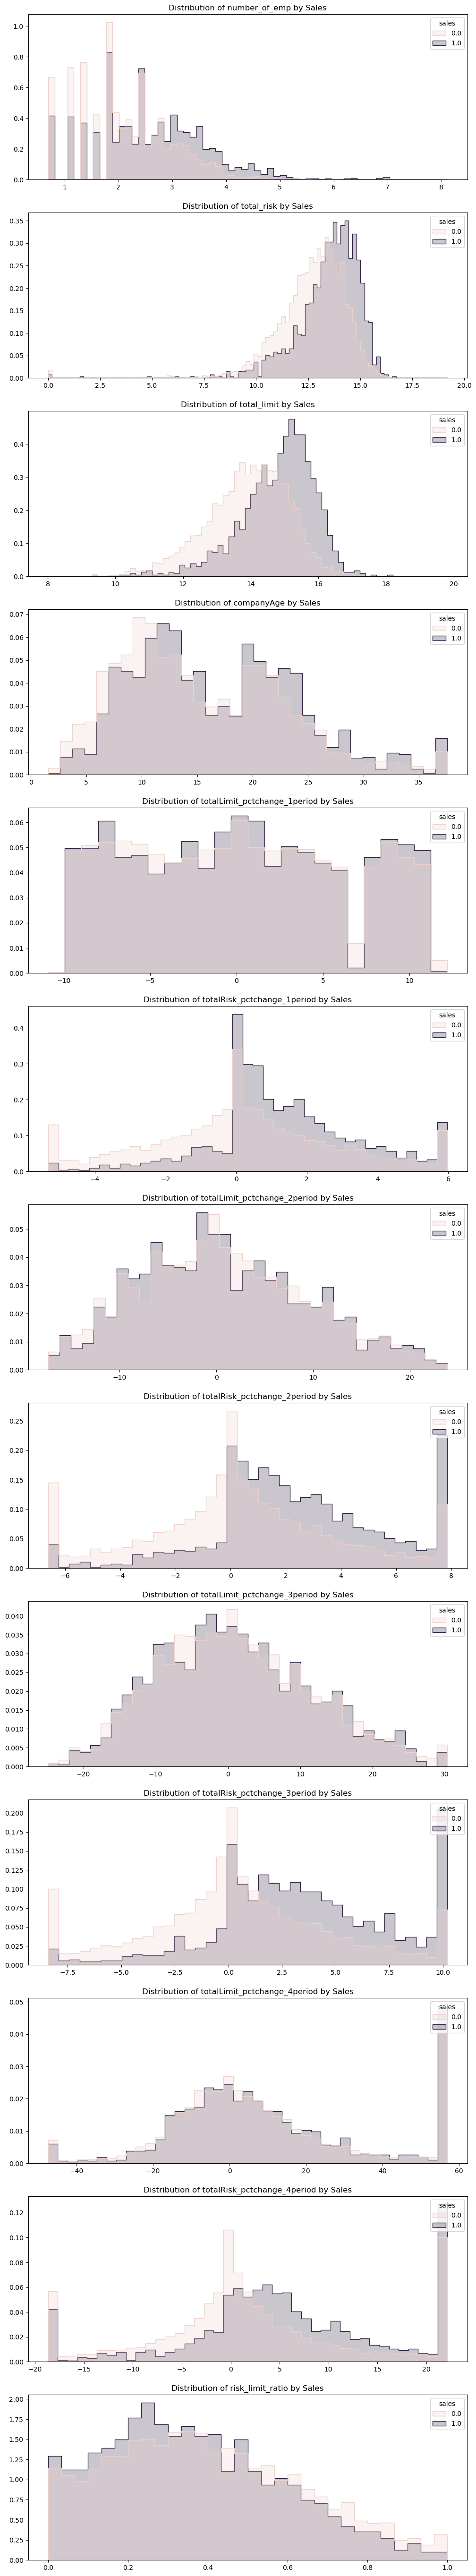

In [49]:
fig, ax = plt.subplots(len(num_features[1:]), 1, figsize=(12 , 5 * len(num_features)))
for i, feature in enumerate(num_features[1:]):
    sns.histplot(data=df_transformed, x=feature, hue='sales', element='step', stat='density', common_norm=False, ax=ax[i])
    ax[i].set_title(f'Distribution of {feature} by Sales')
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
plt.show()

Distributions of the columns look much better now. In this step, I will visualize the data distribution by the target column using boxplots.

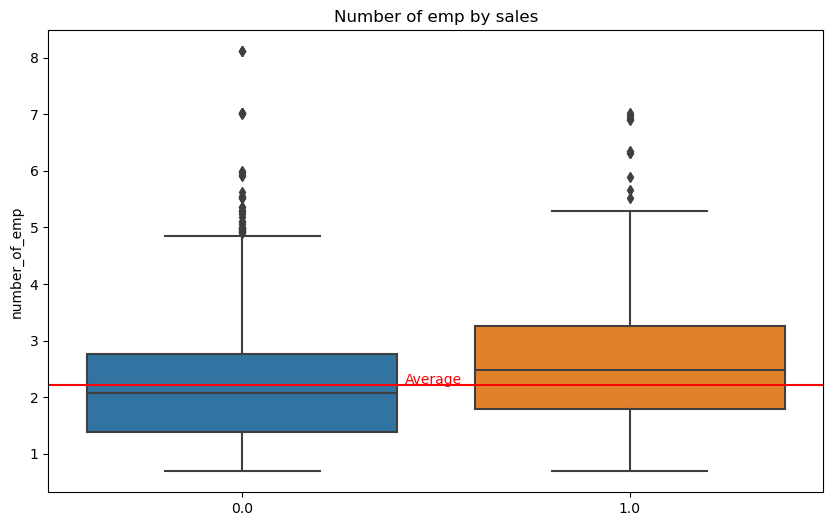

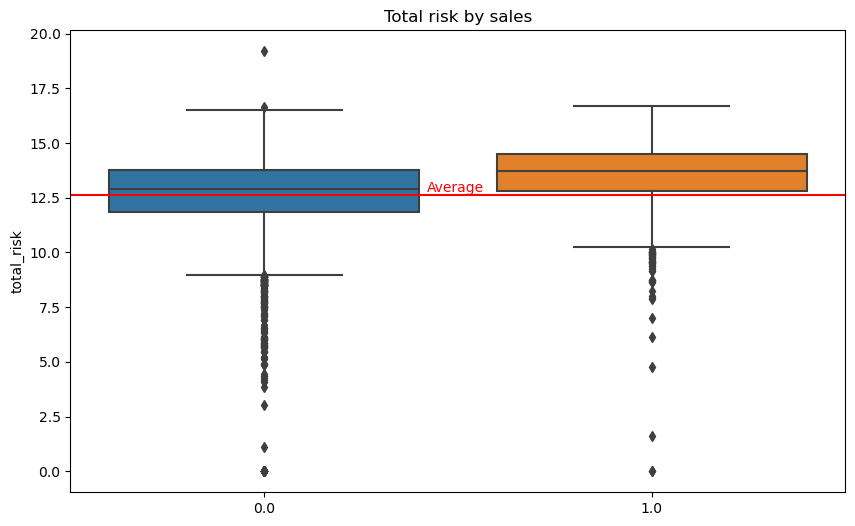

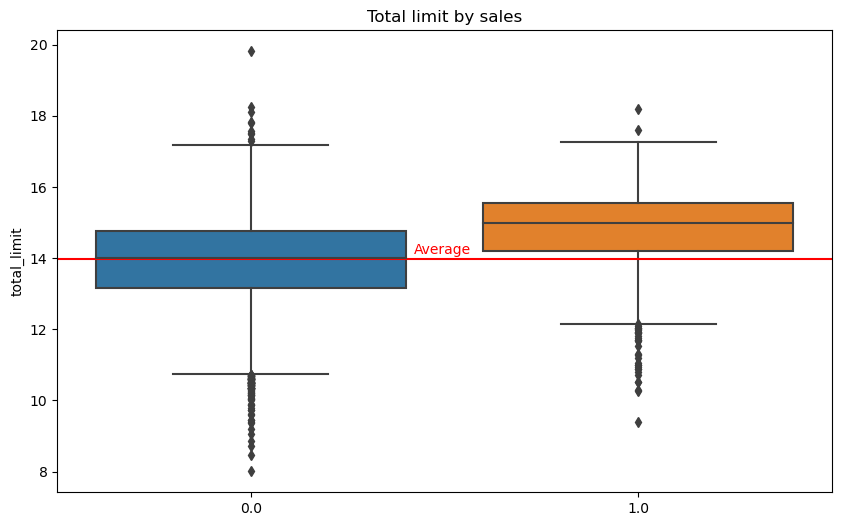

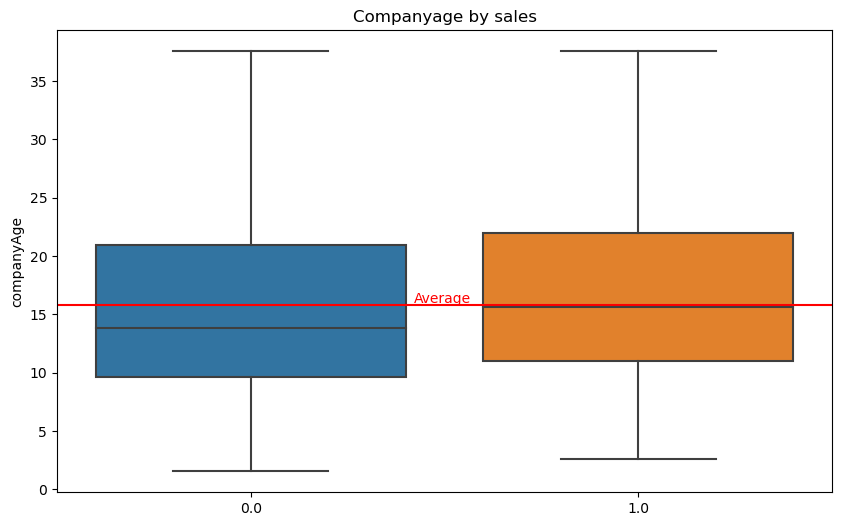

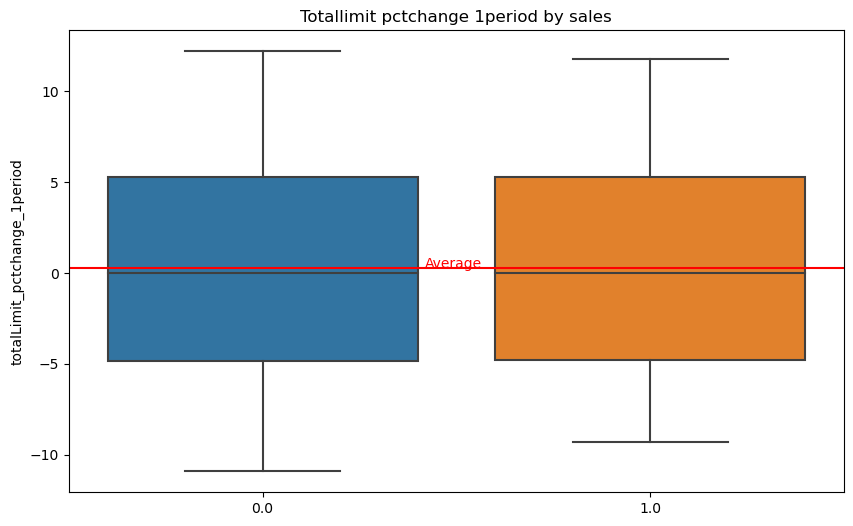

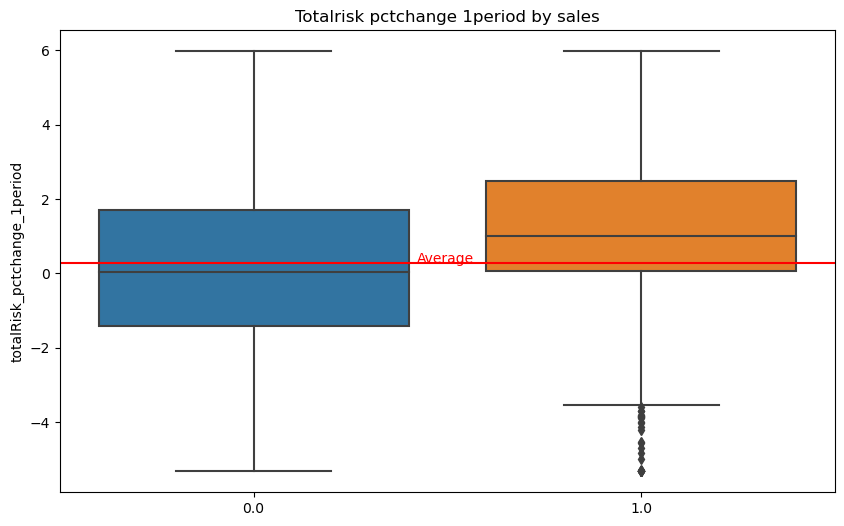

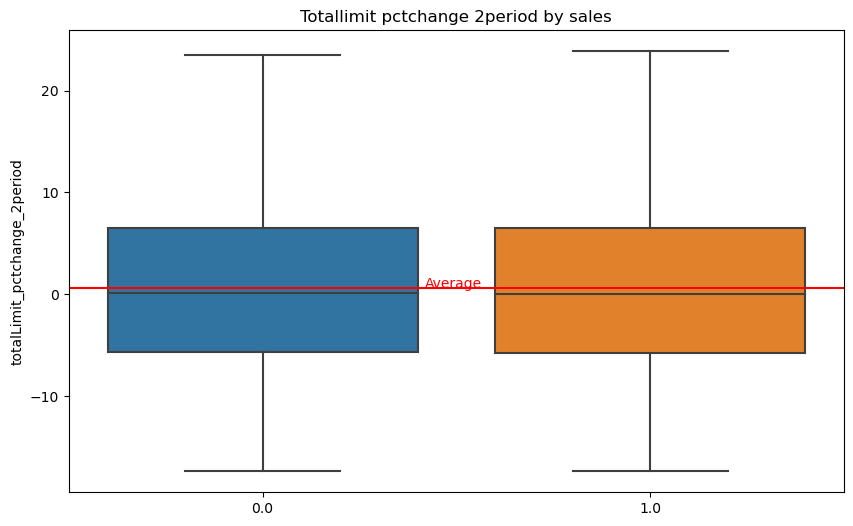

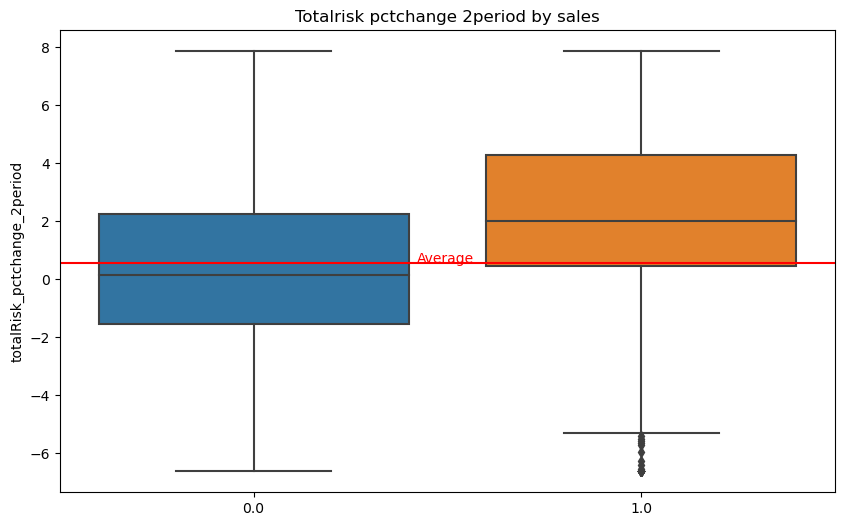

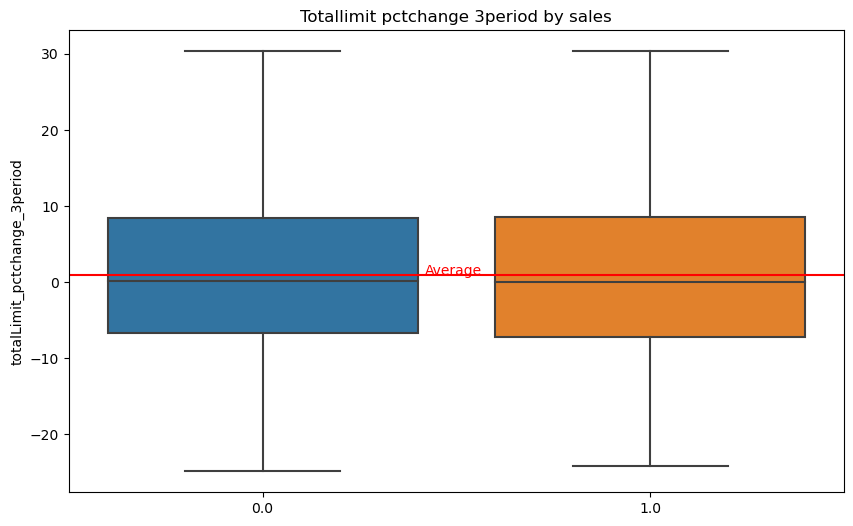

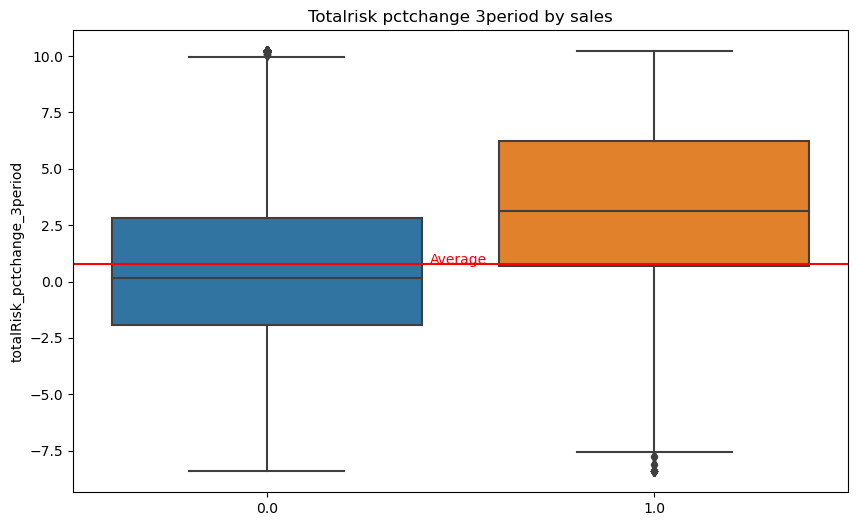

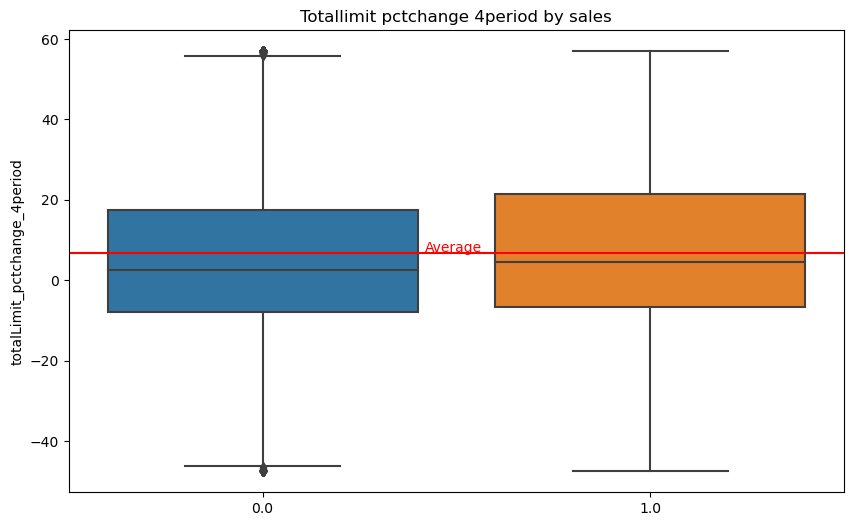

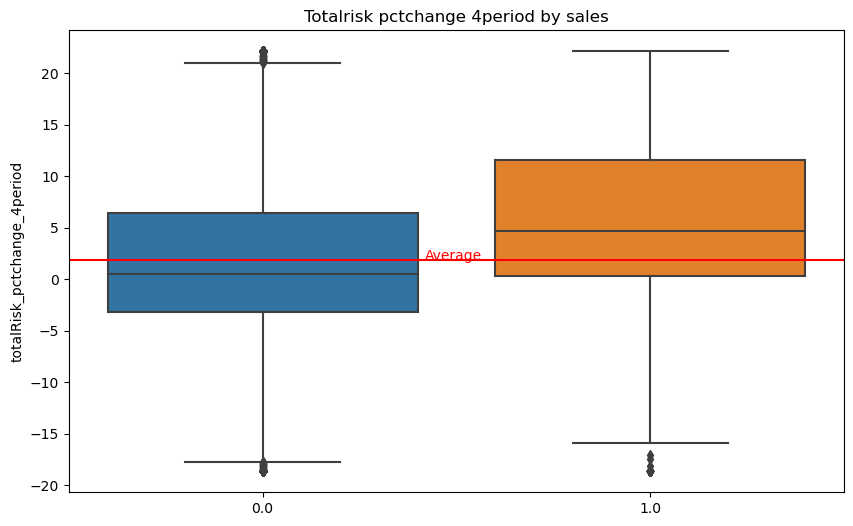

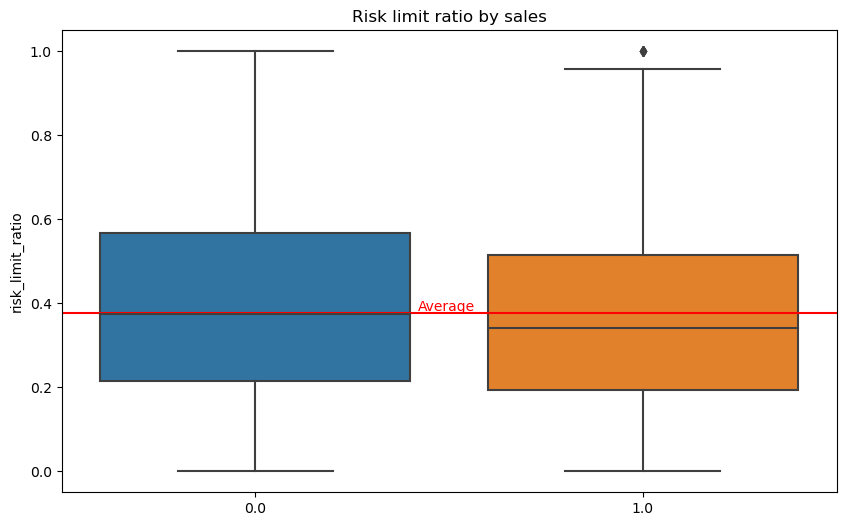

In [50]:
for column in num_features[1:]:
    fig, ax = plt.subplots(figsize=(10,6))
    sns.boxplot(x='sales', y=column, data=df_transformed)
    
    mean_val = df_transformed[column].mean()
    ax.axhline(y = mean_val, c= "r")
    ax.annotate('Average', xy=(0.3, mean_val), 
                xytext=(0.42, mean_val + 0.01 * abs(mean_val)), c= "r")

    ax.set_xlabel("")
    plt.title(f'{column.replace("_", " ").capitalize()} by sales')
    plt.show()

Total limit, total risk, and percentage changes in the risk seem to have higher predictive power since the distribution of the target differs the most in these columns.

Let's check for the distribution of the continuous independent variables in combination with the categorical variables by the target.

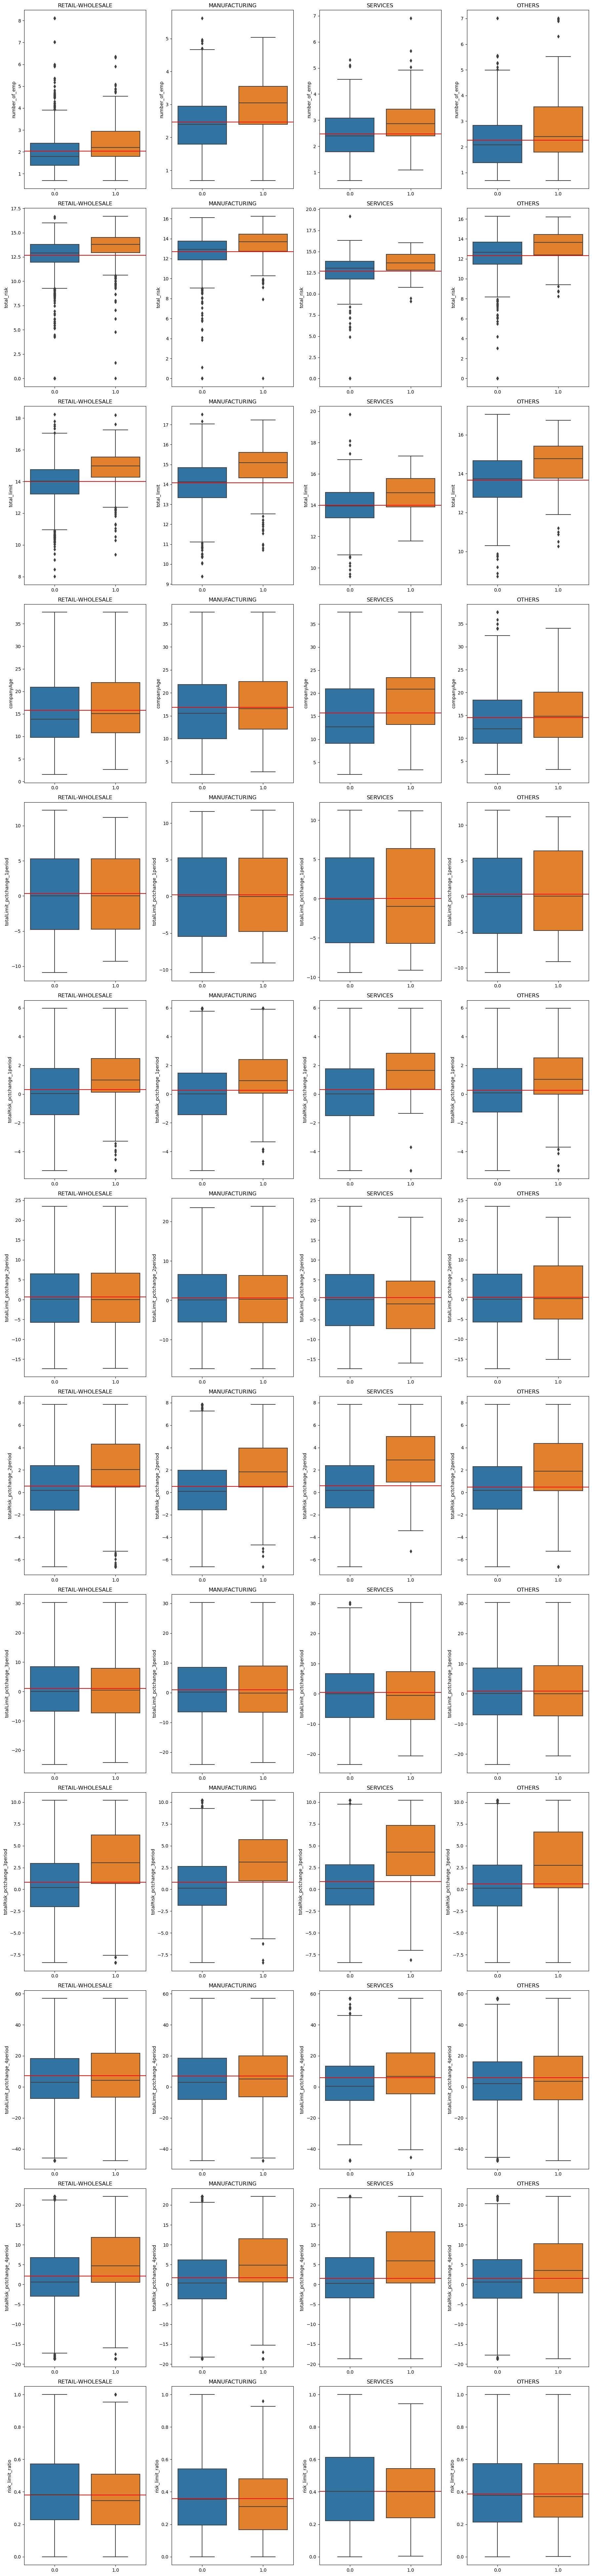

In [51]:
sectors = df_transformed['sector'].unique()
num_plots = len(num_features[1:])

fig, axes = plt.subplots(nrows=num_plots, ncols=len(sectors), figsize=(18, 6*num_plots))

for idx, feature in enumerate(num_features[1:]):
    for jdx, sector in enumerate(sectors):
        df_sector = df_transformed[df_transformed['sector'] == sector]
        ax = axes[idx][jdx]

        sns.boxplot(x='sales', y=feature, data=df_sector, ax=ax)
        mean_val = df_sector[feature].mean()
        ax.axhline(y = mean_val, color='r')
        ax.set_title(f'{sector}')
        ax.set_xlabel("")
        ax.set_ylabel(f'{feature}')
        
plt.tight_layout()
plt.show()

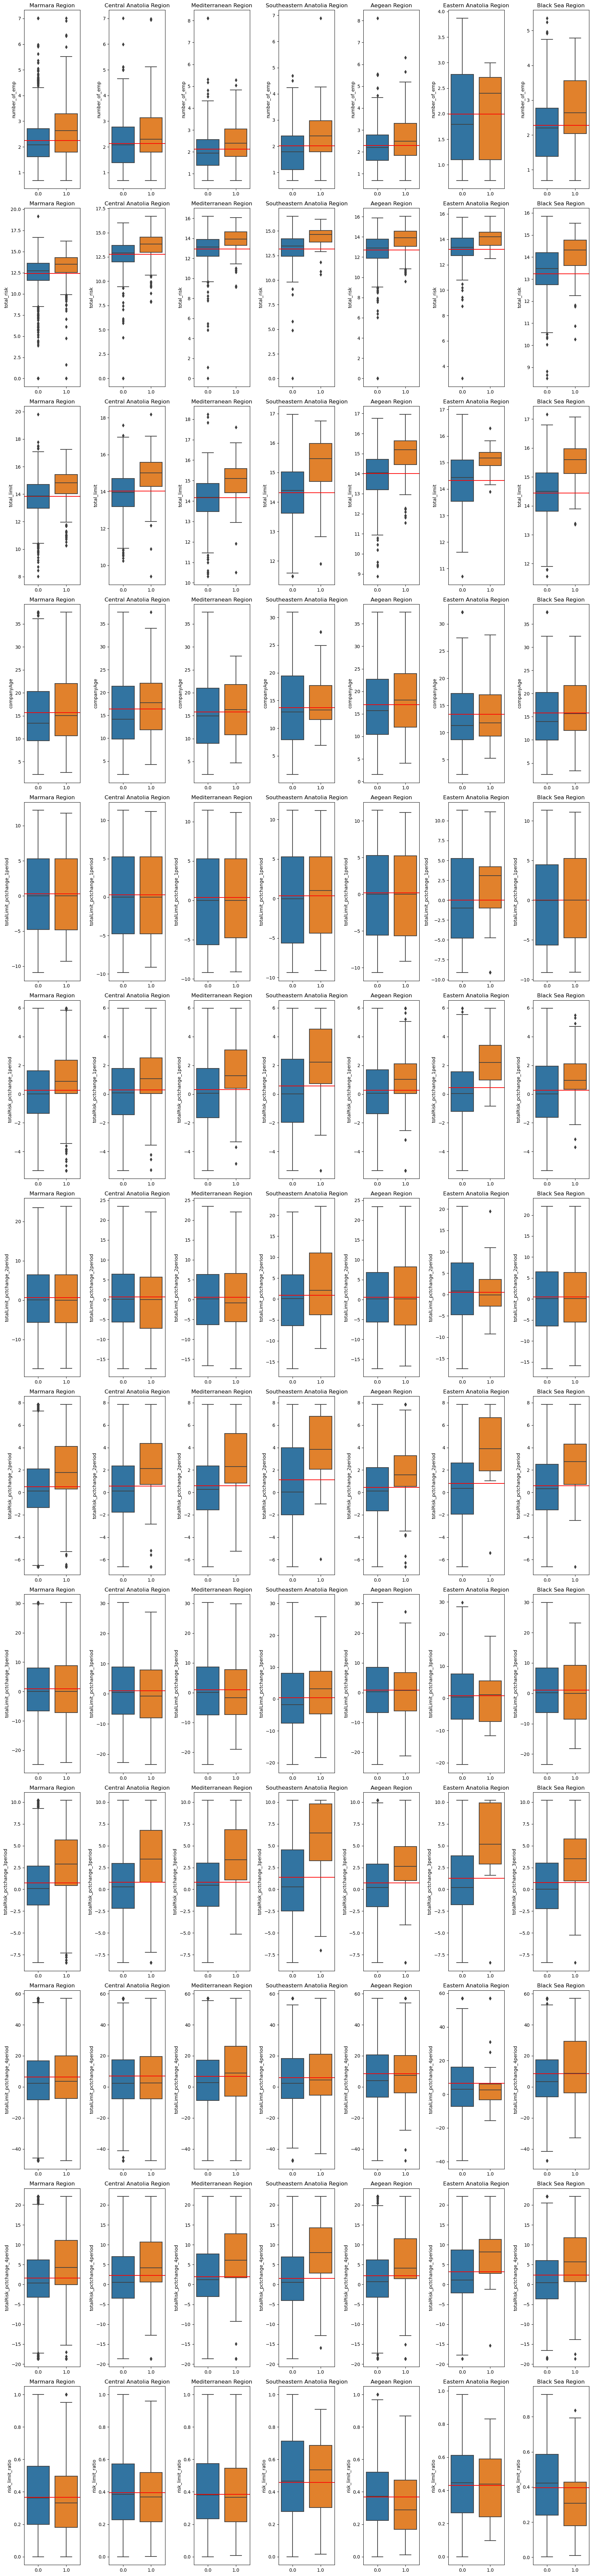

In [52]:
regions = df_transformed['region'].unique()
num_plots = len(num_features[1:])

fig, axes = plt.subplots(nrows=num_plots, ncols=len(regions), figsize=(18, 6*num_plots))

for idx, feature in enumerate(num_features[1:]):
    for jdx, region in enumerate(regions):
        df_region = df_transformed[df_transformed['region'] == region]
        ax = axes[idx][jdx]

        sns.boxplot(x='sales', y=feature, data=df_region, ax=ax)
        mean_val = df_region[feature].mean()
        ax.axhline(y = mean_val, color='r')
        ax.set_title(f'{region}')
        ax.set_xlabel("")
        ax.set_ylabel(f'{feature}')
        
plt.tight_layout()
plt.show()

There are some significant differences in the distribution of the continuous variables in combination with the categorical independent variables by the target. Categorical independent variables might increase the predictive power of the model. I will one-hot encode them to use in my model.

I will also create a step to drop columns holding the percentage change in the limit since their distributions doesn't really change by the target. 

In [53]:
lowImpactCols = ['totalLimit_pctchange_1period','totalLimit_pctchange_2period','totalLimit_pctchange_3period','totalLimit_pctchange_4period', "quarter"]

class ColumnDropper(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns_to_drop):
        self.columns_to_drop = columns_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        
        # Belirtilen özelliklerin düşürülmesi
        X_transformed = X_transformed.drop(columns=self.columns_to_drop)

        return X_transformed

In [54]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator()),
    ('outlier_clipper', OutlierClipper(IQR_columns)),
    ('log_transformer', LogTransformer(log_columns)),
    ('column_dropper', ColumnDropper(lowImpactCols))
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.head()

sales  number_of_emp            sector                        region  \
0    NaN       2.197225  RETAIL-WHOLESALE                Marmara Region   
1    0.0       3.091042     MANUFACTURING       Central Anatolia Region   
2    0.0       2.079442  RETAIL-WHOLESALE          Mediterranean Region   
3    1.0       3.555348     MANUFACTURING  Southeastern Anatolia Region   
4    0.0       2.772589          SERVICES                 Aegean Region   

   total_risk  total_limit  companyAge  totalRisk_pctchange_1period  \
0   11.164998    15.761473       16.94                    -0.101435   
1   13.433757    14.671436       23.83                     0.308520   
2   11.659153    13.292484       21.94                     0.508093   
3   10.577324    14.720041       13.74                     0.003551   
4   11.168955    13.133837       11.70                     0.112379   

   totalRisk_pctchange_2period  totalRisk_pctchange_3period  \
0                    -0.063896                     0.039722   
1                    -1.149085                    -2.592018   
2                     2.092820                     0.912823   
3                     0.050353                     0.084789   
4                     1.510154                     1.330918   

   totalRisk_pctchange_4period  risk_limit_ratio  OTHERS_Southeastern  \
0                     0.397099          0.010087                    0   
1                    -0.016176          0.290056                    0   
2                    -0.108592          0.195277                    0   
3                     0.164732          0.015879                    0   
4                    -1.799597          0.140171                    0   

   RETAIL_Eastern  MANUFACTURING_BlackSea_Central  
0               0                               0  
1               0                               1  
2               0                               0  
3               0                               0  
4               0                               0

In [55]:
df_transformed.describe()

sales  number_of_emp    total_risk   total_limit    companyAge  \
count  8507.000000   11335.000000  11335.000000  11335.000000  11335.000000   
mean      0.169507       2.212739     12.629372     13.964359     15.833413   
std       0.375222       0.933192      1.801693      1.290023      7.420738   
min       0.000000       0.693147      0.000000      7.831617      1.550000   
25%       0.000000       1.609438     11.710985     13.162866     10.010000   
50%       0.000000       2.079442     12.906320     14.086530     14.510000   
75%       0.000000       2.772589     13.839448     14.887585     21.030000   
max       1.000000       8.111928     21.362392     21.362392     37.560000   

       totalRisk_pctchange_1period  totalRisk_pctchange_2period  \
count                 11335.000000                 11335.000000   
mean                      0.290121                     0.548932   
std                       2.518611                     3.371229   
min                      -5.322471                    -6.621237   
25%                      -1.086294                    -1.191624   
50%                       0.160772                     0.307816   
75%                       1.737824                     2.428118   
max                       5.974001                     7.857730   

       totalRisk_pctchange_3period  totalRisk_pctchange_4period  \
count                 11335.000000                 11335.000000   
mean                      0.785764                     1.869412   
std                       4.264747                    10.636232   
min                      -8.414022                   -18.660791   
25%                      -1.430717                    -3.361618   
50%                       0.367070                     0.658905   
75%                       3.224820                     6.837830   
max                      10.208125                    22.137002   

       risk_limit_ratio  OTHERS_Southeastern  RETAIL_Eastern  \
count      11335.000000         11335.000000    11335.000000   
mean           0.377768             0.003088        0.010763   
std            0.235474             0.055484        0.103190   
min            0.000000             0.000000        0.000000   
25%            0.192724             0.000000        0.000000   
50%            0.353281             0.000000        0.000000   
75%            0.538452             0.000000        0.000000   
max            1.000000             1.000000        1.000000   

       MANUFACTURING_BlackSea_Central  
count                    11335.000000  
mean                         0.040670  
std                          0.197534  
min                          0.000000  
25%                          0.000000  
50%                          0.000000  
75%                          0.000000  
max                          1.000000

In [56]:
scale_cols = ['number_of_emp', 'total_risk', 'total_limit', 'companyAge', 'totalRisk_pctchange_1period', 'totalRisk_pctchange_2period', 'totalRisk_pctchange_3period', 'totalRisk_pctchange_4period']

class CustomMinMaxScaler(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.min_max_scaler = pre.MinMaxScaler()

    def fit(self, X, y=None):
        self.min_max_scaler.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy[self.columns] = self.min_max_scaler.transform(X[self.columns])
        return X_copy

In [57]:
preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator()),
    ('outlier_clipper', OutlierClipper(IQR_columns)),
    ('log_transformer', LogTransformer(log_columns)),
    ('column_dropper', ColumnDropper(lowImpactCols)),
    ('CustomMinMaxScaler', CustomMinMaxScaler(scale_cols))
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.head()

sales  number_of_emp            sector                        region  \
0    NaN       0.202739  RETAIL-WHOLESALE                Marmara Region   
1    0.0       0.323220     MANUFACTURING       Central Anatolia Region   
2    0.0       0.186863  RETAIL-WHOLESALE          Mediterranean Region   
3    1.0       0.385805     MANUFACTURING  Southeastern Anatolia Region   
4    0.0       0.280294          SERVICES                 Aegean Region   

   total_risk  total_limit  companyAge  totalRisk_pctchange_1period  \
0    0.522647     0.586061    0.427381                     0.462183   
1    0.628851     0.505501    0.618717                     0.498473   
2    0.545779     0.403589    0.566232                     0.516140   
3    0.495138     0.509093    0.338517                     0.471477   
4    0.522833     0.391864    0.281866                     0.481110   

   totalRisk_pctchange_2period  totalRisk_pctchange_3period  \
0                     0.452887                     0.453962   
1                     0.377938                     0.312639   
2                     0.601842                     0.500847   
3                     0.460778                     0.456382   
4                     0.561600                     0.523298   

   totalRisk_pctchange_4period  risk_limit_ratio  OTHERS_Southeastern  \
0                     0.467130          0.010087                    0   
1                     0.457001          0.290056                    0   
2                     0.454735          0.195277                    0   
3                     0.461435          0.015879                    0   
4                     0.413287          0.140171                    0   

   RETAIL_Eastern  MANUFACTURING_BlackSea_Central  
0               0                               0  
1               0                               1  
2               0                               0  
3               0                               0  
4               0                               0

In [63]:
class CustomOneHotEncoder(base.BaseEstimator, base.TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        self.one_hot_encoder = pre.OneHotEncoder(sparse_output=False, handle_unknown='ignore')

    def fit(self, X, y=None):
        self.one_hot_encoder.fit(X[self.columns])
        return self

    def transform(self, X):
        X_copy = X.copy()
        one_hot_encoded_cols = self.one_hot_encoder.transform(X[self.columns])
        one_hot_encoded_df = pd.DataFrame(one_hot_encoded_cols, columns=self.one_hot_encoder.get_feature_names_out(self.columns))
        
        X_copy = X_copy.drop(columns=self.columns)
        X_copy = pd.concat([X_copy, one_hot_encoded_df], axis=1)

        return X_copy


In [64]:
cat_cols = ["sector", "region"]

preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator()),
    ('outlier_clipper', OutlierClipper(IQR_columns)),
    ('log_transformer', LogTransformer(log_columns)),
    ('column_dropper', ColumnDropper(lowImpactCols)),
    ('CustomMinMaxScaler', CustomMinMaxScaler(scale_cols)),
    ('CustomOneHotEncoder', CustomOneHotEncoder(cat_cols))
])

df_transformed = preprocessing_pipeline.fit_transform(df)
df_transformed.head()

sales  number_of_emp  total_risk  total_limit  companyAge  \
0    NaN       0.202739    0.522647     0.586061    0.427381   
1    0.0       0.323220    0.628851     0.505501    0.618717   
2    0.0       0.186863    0.545779     0.403589    0.566232   
3    1.0       0.385805    0.495138     0.509093    0.338517   
4    0.0       0.280294    0.522833     0.391864    0.281866   

   totalRisk_pctchange_1period  totalRisk_pctchange_2period  \
0                     0.462183                     0.452887   
1                     0.498473                     0.377938   
2                     0.516140                     0.601842   
3                     0.471477                     0.460778   
4                     0.481110                     0.561600   

   totalRisk_pctchange_3period  totalRisk_pctchange_4period  risk_limit_ratio  \
0                     0.453962                     0.467130          0.010087   
1                     0.312639                     0.457001          0.290056   
2                     0.500847                     0.454735          0.195277   
3                     0.456382                     0.461435          0.015879   
4                     0.523298                     0.413287          0.140171   

   ...  sector_OTHERS  sector_RETAIL-WHOLESALE  sector_SERVICES  \
0  ...            0.0                      1.0              0.0   
1  ...            0.0                      0.0              0.0   
2  ...            0.0                      1.0              0.0   
3  ...            0.0                      0.0              0.0   
4  ...            0.0                      0.0              1.0   

   region_Aegean Region  region_Black Sea Region  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   1.0                      0.0   

   region_Central Anatolia Region  region_Eastern Anatolia Region  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   region_Marmara Region  region_Mediterranean Region  \
0                    1.0                          0.0   
1                    0.0                          0.0   
2                    0.0                          1.0   
3                    0.0                          0.0   
4                    0.0                          0.0   

   region_Southeastern Anatolia Region  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  1.0  
4                                  0.0  

[5 rows x 24 columns]

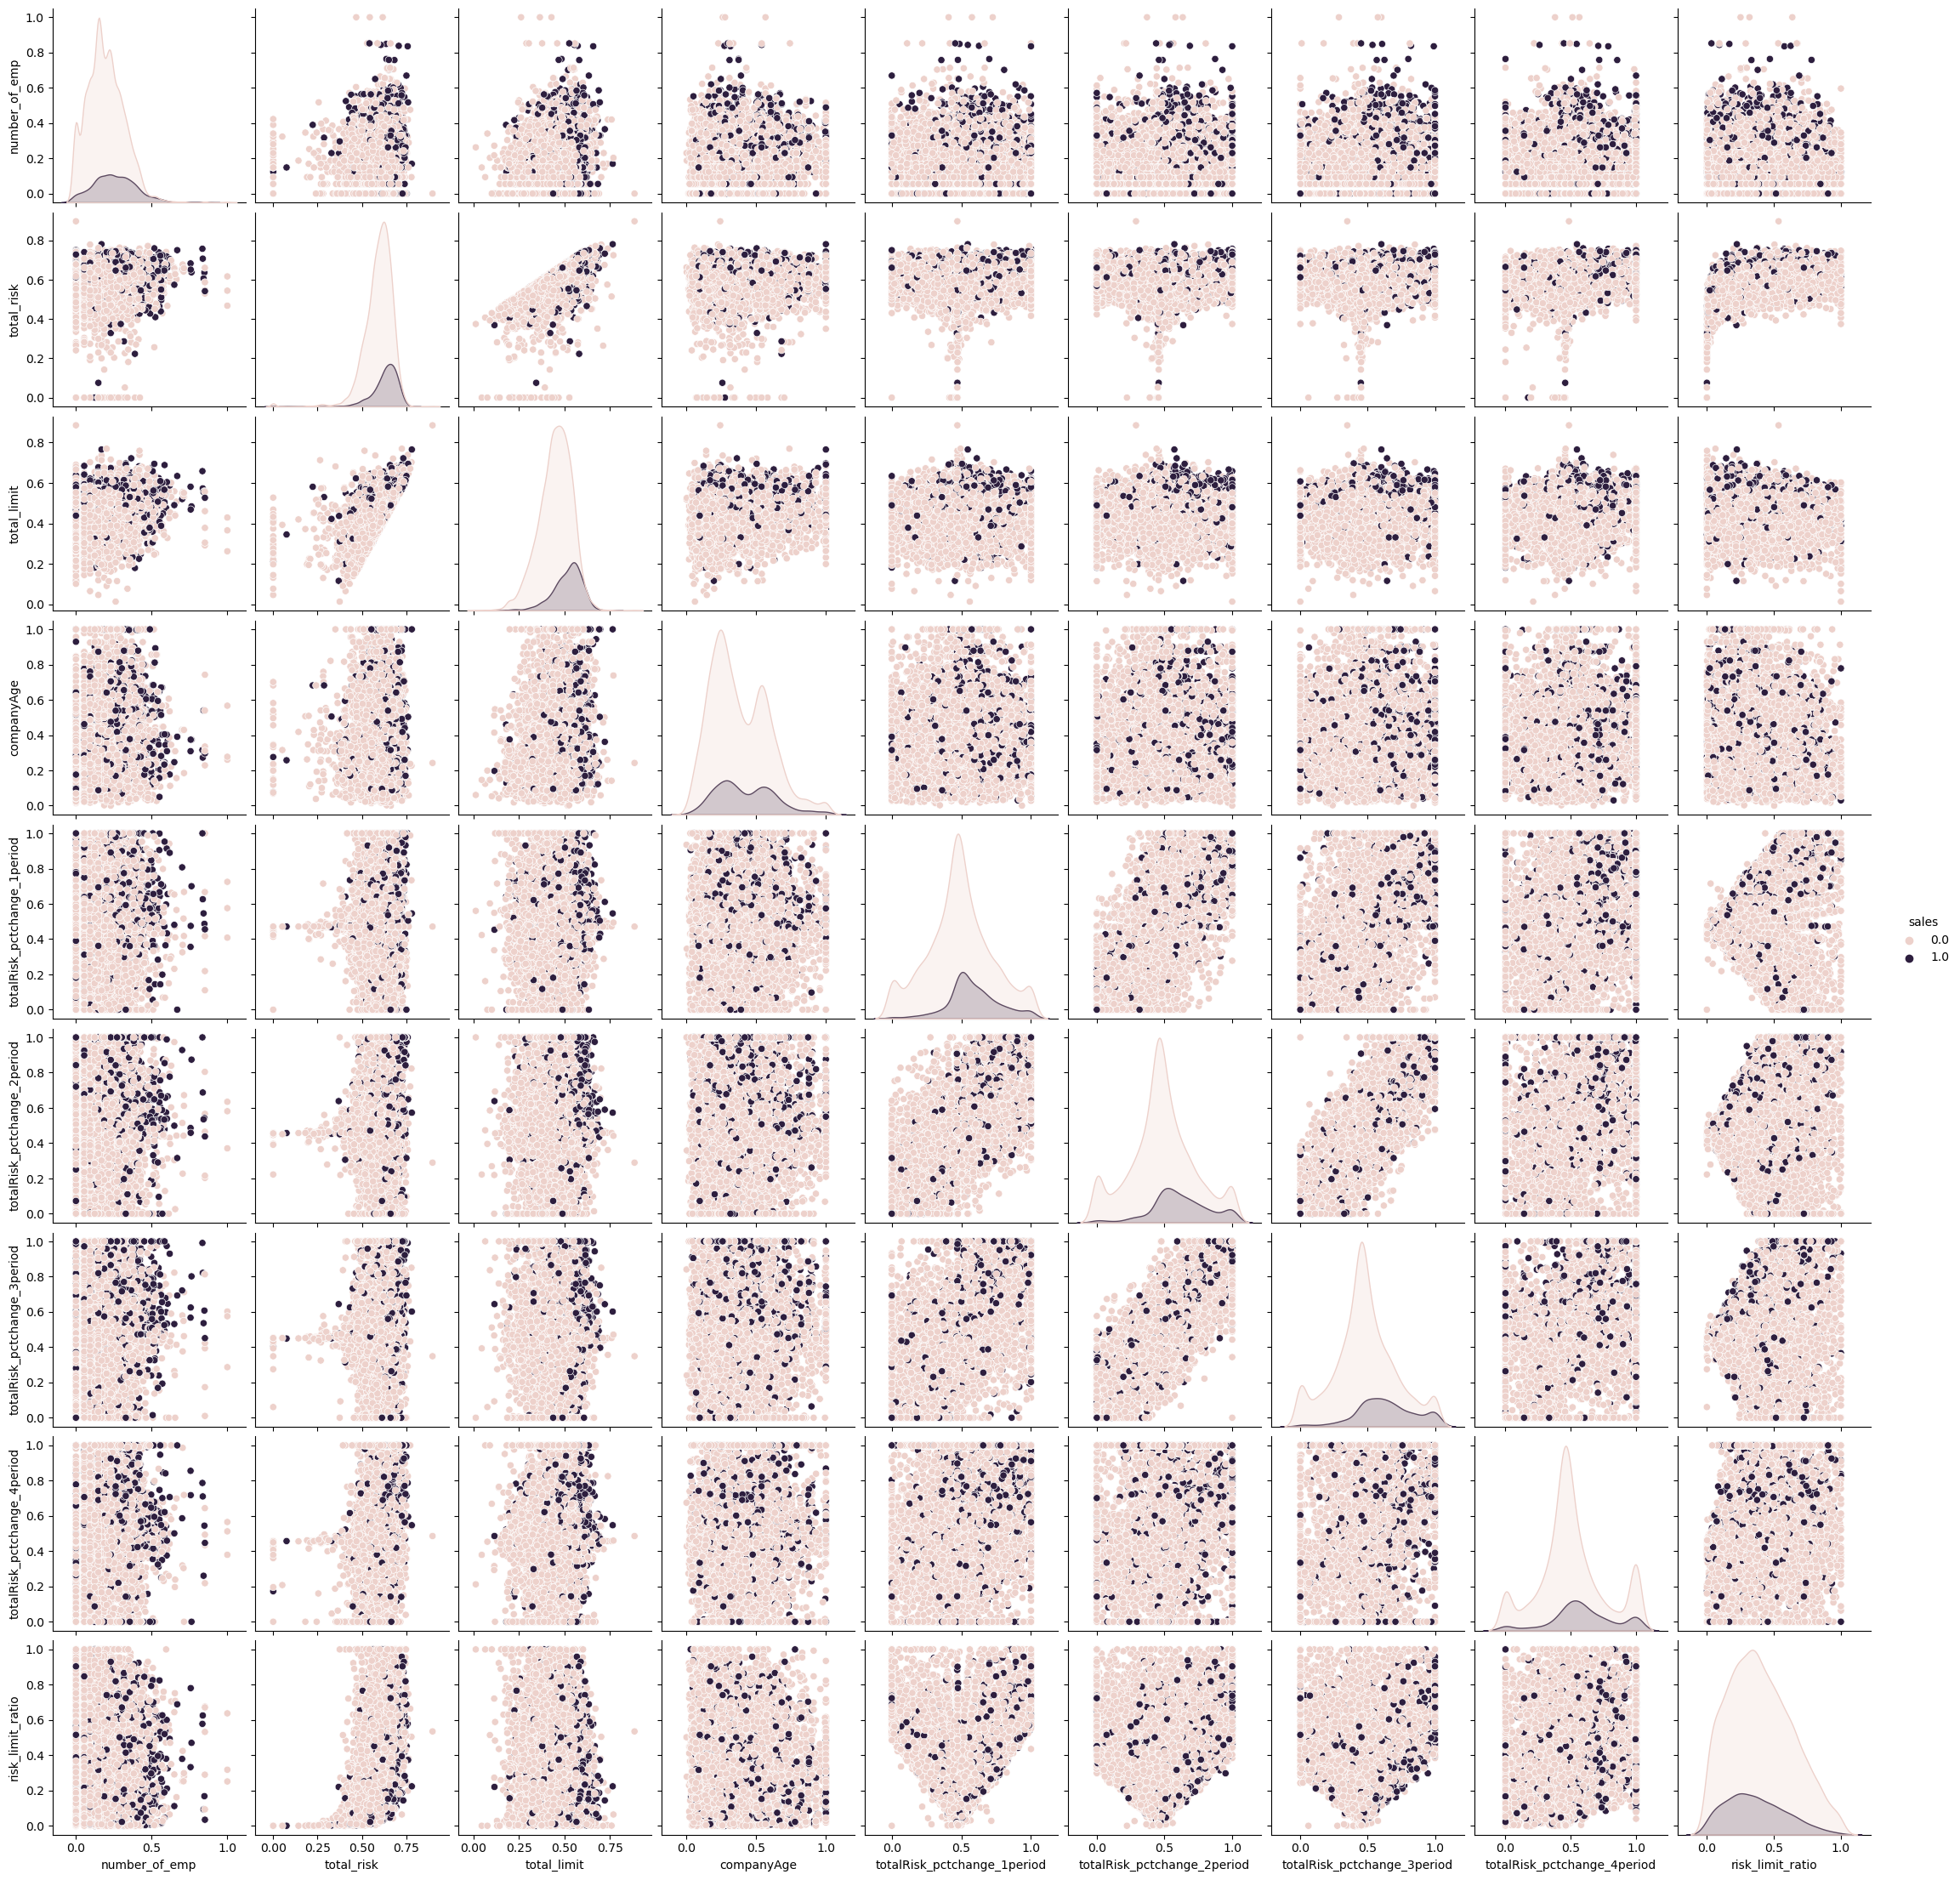

In [62]:
sns.pairplot(df_transformed[["sales","number_of_emp","total_risk","total_limit","companyAge",\
                             "totalRisk_pctchange_1period","totalRisk_pctchange_2period",\
                             "totalRisk_pctchange_3period","totalRisk_pctchange_4period","risk_limit_ratio"]],
             hue="sales")
plt.show()

In [66]:
log_columns = ['number_of_emp', 'total_risk', 'total_limit']

IQR_columns = ["companyAge", 'totalLimit_pctchange_1period', 'totalRisk_pctchange_1period', 'totalLimit_pctchange_2period',\
               'totalRisk_pctchange_2period', 'totalLimit_pctchange_3period', 'totalRisk_pctchange_3period',\
               'totalLimit_pctchange_4period', 'totalRisk_pctchange_4period']

scale_cols = ['number_of_emp', 'total_risk', 'total_limit', 'companyAge', 'totalRisk_pctchange_1period', 'totalRisk_pctchange_2period', 'totalRisk_pctchange_3period', 'totalRisk_pctchange_4period']

lowImpactCols = ['totalLimit_pctchange_1period','totalLimit_pctchange_2period','totalLimit_pctchange_3period','totalLimit_pctchange_4period', "quarter"]

cat_cols = ["sector", "region"]

preprocessing_pipeline = pip.Pipeline([
    ('Employee_Nr_Imputer', EmployeeNrImputer()),
    ('Limit_Risk_Imputer', LimitRiskImputer()),
    ('change_calculator', ChangeCalculator()),
    ('risk_limit_ratio_calculator', RiskLimitRatioCalculator()),
    ('creatt_categorical_features', CategoricalGenerator()),
    ('outlier_clipper', OutlierClipper(IQR_columns)),
    ('log_transformer', LogTransformer(log_columns)),
    ('column_dropper', ColumnDropper(lowImpactCols)),
    ('CustomMinMaxScaler', CustomMinMaxScaler(scale_cols)),
    ('CustomOneHotEncoder', CustomOneHotEncoder(cat_cols))
])

df_transformed_final = preprocessing_pipeline.fit_transform(df)
df_transformed_final.head()

sales  number_of_emp  total_risk  total_limit  companyAge  \
0    NaN       0.202739    0.522647     0.586061    0.427381   
1    0.0       0.323220    0.628851     0.505501    0.618717   
2    0.0       0.186863    0.545779     0.403589    0.566232   
3    1.0       0.385805    0.495138     0.509093    0.338517   
4    0.0       0.280294    0.522833     0.391864    0.281866   

   totalRisk_pctchange_1period  totalRisk_pctchange_2period  \
0                     0.462183                     0.452887   
1                     0.498473                     0.377938   
2                     0.516140                     0.601842   
3                     0.471477                     0.460778   
4                     0.481110                     0.561600   

   totalRisk_pctchange_3period  totalRisk_pctchange_4period  risk_limit_ratio  \
0                     0.453962                     0.467130          0.010087   
1                     0.312639                     0.457001          0.290056   
2                     0.500847                     0.454735          0.195277   
3                     0.456382                     0.461435          0.015879   
4                     0.523298                     0.413287          0.140171   

   ...  sector_OTHERS  sector_RETAIL-WHOLESALE  sector_SERVICES  \
0  ...            0.0                      1.0              0.0   
1  ...            0.0                      0.0              0.0   
2  ...            0.0                      1.0              0.0   
3  ...            0.0                      0.0              0.0   
4  ...            0.0                      0.0              1.0   

   region_Aegean Region  region_Black Sea Region  \
0                   0.0                      0.0   
1                   0.0                      0.0   
2                   0.0                      0.0   
3                   0.0                      0.0   
4                   1.0                      0.0   

   region_Central Anatolia Region  region_Eastern Anatolia Region  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   region_Marmara Region  region_Mediterranean Region  \
0                    1.0                          0.0   
1                    0.0                          0.0   
2                    0.0                          1.0   
3                    0.0                          0.0   
4                    0.0                          0.0   

   region_Southeastern Anatolia Region  
0                                  0.0  
1                                  0.0  
2                                  0.0  
3                                  1.0  
4                                  0.0  

[5 rows x 24 columns]

Preprocessing pipeline is ready! Let's try if there there would be any problem using it with train-test split.

In [67]:
train = df[~df["sales"].isna()]
test = df[df["sales"].isna()]
display(train.head())
display(test.head())

quarter  sales  number_of_emp            sector  \
1  2015Q4    0.0           21.0     MANUFACTURING   
2  2010Q4    0.0            7.0  RETAIL-WHOLESALE   
3  2012Q4    1.0           34.0     MANUFACTURING   
4  2013Q4    0.0           15.0          SERVICES   
6  2017Q4    0.0            8.0     MANUFACTURING   

                         region  total_risk  total_limit  totalRiskT1  \
1       Central Anatolia Region    682662.0    2353551.0     675909.0   
2          Mediterranean Region    115745.0     592723.0     112913.0   
3  Southeastern Anatolia Region     39234.0    2470770.0      39148.0   
4                 Aegean Region     70894.0     505769.0      70337.0   
6                Marmara Region    107401.0     873091.0     110574.0   

   totalRiskT2  totalRiskT3  totalRiskT4  totalLimitT1  totalLimitT2  \
1     709079.0     738072.0     683153.0     2188838.0     2298960.0   
2     105124.0     111205.0     116312.0      557378.0      507497.0   
3      38039.0      37282.0      35821.0     2422098.0     2373239.0   
4      63175.0      63554.0      80901.0      495645.0      511140.0   
6     121806.0     110866.0     114437.0      820978.0      788409.0   

   totalLimitT3  totalLimitT4  companyAge  
1     2137717.0     3035324.0       23.83  
2      497358.0      522139.0       21.94  
3     2302184.0     2071846.0       13.74  
4      551499.0      556069.0       11.70  
6      740777.0      792481.0       17.55

quarter  sales  number_of_emp            sector                   region  \
0   2017Q4    NaN            8.0  RETAIL-WHOLESALE           Marmara Region   
5   2011Q4    NaN           25.0            OTHERS           Marmara Region   
7   2012Q4    NaN           13.0     MANUFACTURING  Eastern Anatolia Region   
12  2015Q4    NaN            5.0  RETAIL-WHOLESALE           Marmara Region   
14  2010Q4    NaN           26.0     MANUFACTURING           Marmara Region   

    total_risk  total_limit  totalRiskT1  totalRiskT2  totalRiskT3  \
0      70614.0    7000362.0      77004.0      75002.0      67859.0   
5     523623.0    1225757.0     544517.0     539410.0     517695.0   
7     299618.0     701820.0     281698.0     270288.0     259819.0   
12   2895741.0    7150146.0    2751024.0    2503249.0    2628063.0   
14    762961.0    2252256.0     716968.0     645411.0     683482.0   

    totalRiskT4  totalLimitT1  totalLimitT2  totalLimitT3  totalLimitT4  \
0       47342.0     6299583.0     6867406.0     6935723.0     5860498.0   
5      167094.0     1127057.0     1105101.0     1204655.0      358533.0   
7      269912.0      771764.0      771376.0      802600.0      754086.0   
12     540186.0     7508195.0     6906977.0     7114497.0      988848.0   
14     636281.0     2364747.0     2223418.0     2178638.0     2265428.0   

    companyAge  
0        16.94  
5        10.94  
7        19.77  
12       10.05  
14       25.95

In [68]:
y = train["sales"]
X = train.drop("sales", axis = 1)

X_train, X_test, y_train, y_test = mod.train_test_split(X, y, test_size=0.3, random_state=42)

display(X_train.head())
display(X_test[:5])
display(y_train.head())
display(y_test[:5])

quarter  number_of_emp            sector                        region  \
3282  2015Q4           11.0  RETAIL-WHOLESALE                Marmara Region   
9060  2017Q4           10.0          SERVICES          Mediterranean Region   
9804  2012Q4           15.0     MANUFACTURING                 Aegean Region   
9368  2017Q4           25.0  RETAIL-WHOLESALE  Southeastern Anatolia Region   
5813  2017Q4            9.0            OTHERS                Marmara Region   

      total_risk  total_limit  totalRiskT1  totalRiskT2  totalRiskT3  \
3282    159852.0    1210891.0     145625.0     130881.0     130792.0   
9060    479729.0     821901.0     494406.0     479622.0     513136.0   
9804   2507485.0    5290972.0    2531968.0    2785528.0    2646367.0   
9368   2567060.0    2846124.0    2566667.0    2464041.0    2341356.0   
5813    244453.0     297275.0     234392.0     223025.0     217777.0   

      totalRiskT4  totalLimitT1  totalLimitT2  totalLimitT3  totalLimitT4  \
3282     196184.0     1295258.0     1231131.0     1181748.0     1289626.0   
9060     340716.0      780567.0      780792.0      811273.0      752351.0   
9804    2408294.0     4973372.0     4873543.0     5311980.0     4940791.0   
9368    2588029.0     2988201.0     3227788.0     3485632.0     3343461.0   
5813     221923.0      267401.0      256147.0      231143.0      221923.0   

      companyAge  
3282        8.96  
9060       10.21  
9804       14.98  
9368        8.86  
5813        2.78

quarter  number_of_emp         sector                        region  \
5885   2013Q4            5.0         OTHERS                Marmara Region   
11227  2010Q4            4.0  MANUFACTURING                Marmara Region   
2853   2012Q4            2.0         OTHERS  Southeastern Anatolia Region   
4744   2016Q4           20.0  MANUFACTURING                Marmara Region   
3601   2017Q4           11.0  MANUFACTURING              Black Sea Region   

       total_risk  total_limit  totalRiskT1  totalRiskT2  totalRiskT3  \
5885        303.0      87869.0         15.0          0.0          0.0   
11227    254352.0     635270.0     279066.0     288040.0     302258.0   
2853    1501073.0    5528914.0    1381011.0    1381044.0    1353478.0   
4744     523910.0    1831716.0     502487.0     522839.0     538323.0   
3601    1460928.0    2142068.0    1578300.0    1736496.0    1631910.0   

       totalRiskT4  totalLimitT1  totalLimitT2  totalLimitT3  totalLimitT4  \
5885         378.0       92665.0       97404.0      106398.0      101064.0   
11227     301972.0      680031.0      619037.0      612778.0      600062.0   
2853     1312523.0     5750943.0     5347717.0     5401431.0     5293601.0   
4744      570187.0     1868941.0     1981425.0     2139801.0     1895472.0   
3601     1847560.0     2291989.0     2429505.0     2575127.0     2878464.0   

       companyAge  
5885        21.01  
11227       12.77  
2853        12.21  
4744        12.58  
3601        20.00

3282    1.0
9060    0.0
9804    1.0
9368    1.0
5813    0.0
Name: sales, dtype: float64

5885     0.0
11227    0.0
2853     1.0
4744     1.0
3601     0.0
Name: sales, dtype: float64

In [69]:
preprocessing_pipeline.fit(X_train)

X_train_transformed = preprocessing_pipeline.transform(X_train)
display(X_train_transformed.head())
X_test_transformed = preprocessing_pipeline.transform(X_test)
display(X_test_transformed.head())

number_of_emp  total_risk  total_limit  companyAge  \
3282       0.241517    0.719407     0.538512    0.205235   
9060       0.229788    0.785390     0.496321    0.239856   
9804       0.280294    0.884686     0.699074    0.371971   
9368       0.345737    0.886096     0.631562    0.202465   
5813       0.216941    0.744911     0.385593    0.034067   

      totalRisk_pctchange_1period  totalRisk_pctchange_2period  \
3282                     0.558317                     0.601323   
9060                     0.307072                     0.450898   
9804                     0.424148                     0.083189   
9368                     0.466780                     0.655232   
5813                     0.783030                     0.987900   

      totalRisk_pctchange_3period  totalRisk_pctchange_4period  \
3282                     0.568485                     0.369340   
9060                     0.237154                     0.895174   
9804                     0.312889                     0.488483   
9368                     0.770813                     0.423421   
5813                     1.000000                     0.689601   

      risk_limit_ratio  OTHERS_Southeastern  ...  sector_OTHERS  \
3282          0.132012                  0.0  ...            0.0   
9060          0.583682                  0.0  ...            NaN   
9804          0.473918                  0.0  ...            NaN   
9368          0.901949                  0.0  ...            NaN   
5813          0.822313                  0.0  ...            0.0   

      sector_RETAIL-WHOLESALE  sector_SERVICES  region_Aegean Region  \
3282                      0.0              0.0                   0.0   
9060                      NaN              NaN                   NaN   
9804                      NaN              NaN                   NaN   
9368                      NaN              NaN                   NaN   
5813                      0.0              0.0                   1.0   

      region_Black Sea Region  region_Central Anatolia Region  \
3282                      0.0                             0.0   
9060                      NaN                             NaN   
9804                      NaN                             NaN   
9368                      NaN                             NaN   
5813                      0.0                             0.0   

      region_Eastern Anatolia Region  region_Marmara Region  \
3282                             0.0                    1.0   
9060                             NaN                    NaN   
9804                             NaN                    NaN   
9368                             NaN                    NaN   
5813                             0.0                    0.0   

      region_Mediterranean Region  region_Southeastern Anatolia Region  
3282                          0.0                                  0.0  
9060                          NaN                                  NaN  
9804                          NaN                                  NaN  
9368                          NaN                                  NaN  
5813                          0.0                                  0.0  

[5 rows x 23 columns]

number_of_emp  total_risk  total_limit  companyAge  \
5885        0.148085    0.343254     0.252887    0.538984   
11227       0.123510    0.747294     0.468276    0.310760   
2853        0.054654    0.853879     0.703863    0.295250   
4744        0.316949    0.790680     0.583578    0.305498   
3601        0.241517    0.852252     0.600620    0.511010   

       totalRisk_pctchange_1period  totalRisk_pctchange_2period  \
5885                      0.491886                     0.470019   
11227                     0.159131                     0.100109   
2853                      0.641762                     0.594333   
4744                      0.562355                     0.453493   
3601                      0.033729                     0.000000   

       totalRisk_pctchange_3period  totalRisk_pctchange_4period  \
5885                      0.458949                     0.437075   
11227                     0.050756                     0.242944   
2853                      0.582261                     0.526863   
4744                      0.410670                     0.378620   
3601                      0.110105                     0.107227   

       risk_limit_ratio  OTHERS_Southeastern  ...  sector_OTHERS  \
5885           0.003448                  0.0  ...            NaN   
11227          0.400384                  0.0  ...            NaN   
2853           0.271495                  1.0  ...            NaN   
4744           0.286021                  0.0  ...            NaN   
3601           0.682018                  0.0  ...            NaN   

       sector_RETAIL-WHOLESALE  sector_SERVICES  region_Aegean Region  \
5885                       NaN              NaN                   NaN   
11227                      NaN              NaN                   NaN   
2853                       NaN              NaN                   NaN   
4744                       NaN              NaN                   NaN   
3601                       NaN              NaN                   NaN   

       region_Black Sea Region  region_Central Anatolia Region  \
5885                       NaN                             NaN   
11227                      NaN                             NaN   
2853                       NaN                             NaN   
4744                       NaN                             NaN   
3601                       NaN                             NaN   

       region_Eastern Anatolia Region  region_Marmara Region  \
5885                              NaN                    NaN   
11227                             NaN                    NaN   
2853                              NaN                    NaN   
4744                              NaN                    NaN   
3601                              NaN                    NaN   

       region_Mediterranean Region  region_Southeastern Anatolia Region  
5885                           NaN                                  NaN  
11227                          NaN                                  NaN  
2853                           NaN                                  NaN  
4744                           NaN                                  NaN  
3601                           NaN                                  NaN  

[5 rows x 23 columns]

In [70]:
df_transformed_final.isna().sum()

sales                                  2828
number_of_emp                             0
total_risk                                0
total_limit                               0
companyAge                                0
totalRisk_pctchange_1period               0
totalRisk_pctchange_2period               0
totalRisk_pctchange_3period               0
totalRisk_pctchange_4period               0
risk_limit_ratio                          0
OTHERS_Southeastern                       0
RETAIL_Eastern                            0
MANUFACTURING_BlackSea_Central            0
sector_MANUFACTURING                      0
sector_OTHERS                             0
sector_RETAIL-WHOLESALE                   0
sector_SERVICES                           0
region_Aegean Region                      0
region_Black Sea Region                   0
region_Central Anatolia Region            0
region_Eastern Anatolia Region            0
region_Marmara Region                     0
region_Mediterranean Region     